In [1]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('Truth_Seeker_Model_Dataset.csv')

In [2]:
df.head()

Unnamed: 0      author                                          statement  \
0           0  D.L. Davis  End of eviction moratorium means millions of A...   
1           1  D.L. Davis  End of eviction moratorium means millions of A...   
2           2  D.L. Davis  End of eviction moratorium means millions of A...   
3           3  D.L. Davis  End of eviction moratorium means millions of A...   
4           4  D.L. Davis  End of eviction moratorium means millions of A...   

   target  BinaryNumTarget                 manual_keywords  \
0    True              1.0  Americans, eviction moratorium   
1    True              1.0  Americans, eviction moratorium   
2    True              1.0  Americans, eviction moratorium   
3    True              1.0  Americans, eviction moratorium   
4    True              1.0  Americans, eviction moratorium   

                                               tweet 5_label_majority_answer  \
0  @POTUS Biden Blunders - 6 Month Update\n\nInfl...            Mostly Agree   
1  @S0SickRick @Stairmaster_ @6d6f636869 Not as m...             NO MAJORITY   
2  THE SUPREME COURT is siding with super rich pr...                   Agree   
3  @POTUS Biden Blunders\n\nBroken campaign promi...            Mostly Agree   
4  @OhComfy I agree. The confluence of events rig...                   Agree   

  3_label_majority_answer  
0                   Agree  
1                   Agree  
2                   Agree  
3                   Agree  
4                   Agree

In [3]:
df.target.value_counts()

target
True     68930
False    65268
Name: count, dtype: int64

In [4]:
df.shape

(134198, 9)

In [5]:
df.isnull().sum()

Unnamed: 0                 0
author                     0
statement                  0
target                     0
BinaryNumTarget            0
manual_keywords            0
tweet                      0
5_label_majority_answer    0
3_label_majority_answer    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               134198 non-null  int64  
 1   author                   134198 non-null  object 
 2   statement                134198 non-null  object 
 3   target                   134198 non-null  bool   
 4   BinaryNumTarget          134198 non-null  float64
 5   manual_keywords          134198 non-null  object 
 6   tweet                    134198 non-null  object 
 7   5_label_majority_answer  134198 non-null  object 
 8   3_label_majority_answer  134198 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 8.3+ MB


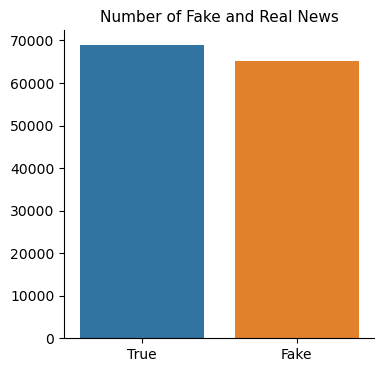

In [7]:
import matplotlib.pyplot as plt
num_Fake =df.target.value_counts()[0]
num_Real = df.target.value_counts()[1]

types = ['True', 'Fake']
counts = [num_Fake, num_Real]

plt.figure(figsize=(4, 4))
sns.barplot(x = types, y = counts)
plt.title("Number of Fake and Real News", fontsize=11)
sns.despine();


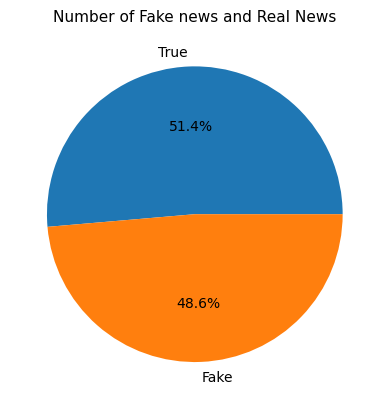

In [8]:
#it show how target feature(classes) it classified.
plt.pie(df.target.value_counts(), labels=['True','Fake'],autopct='%1.1f%%')
plt.title("Number of Fake news and Real News", fontsize=11)
plt.show()

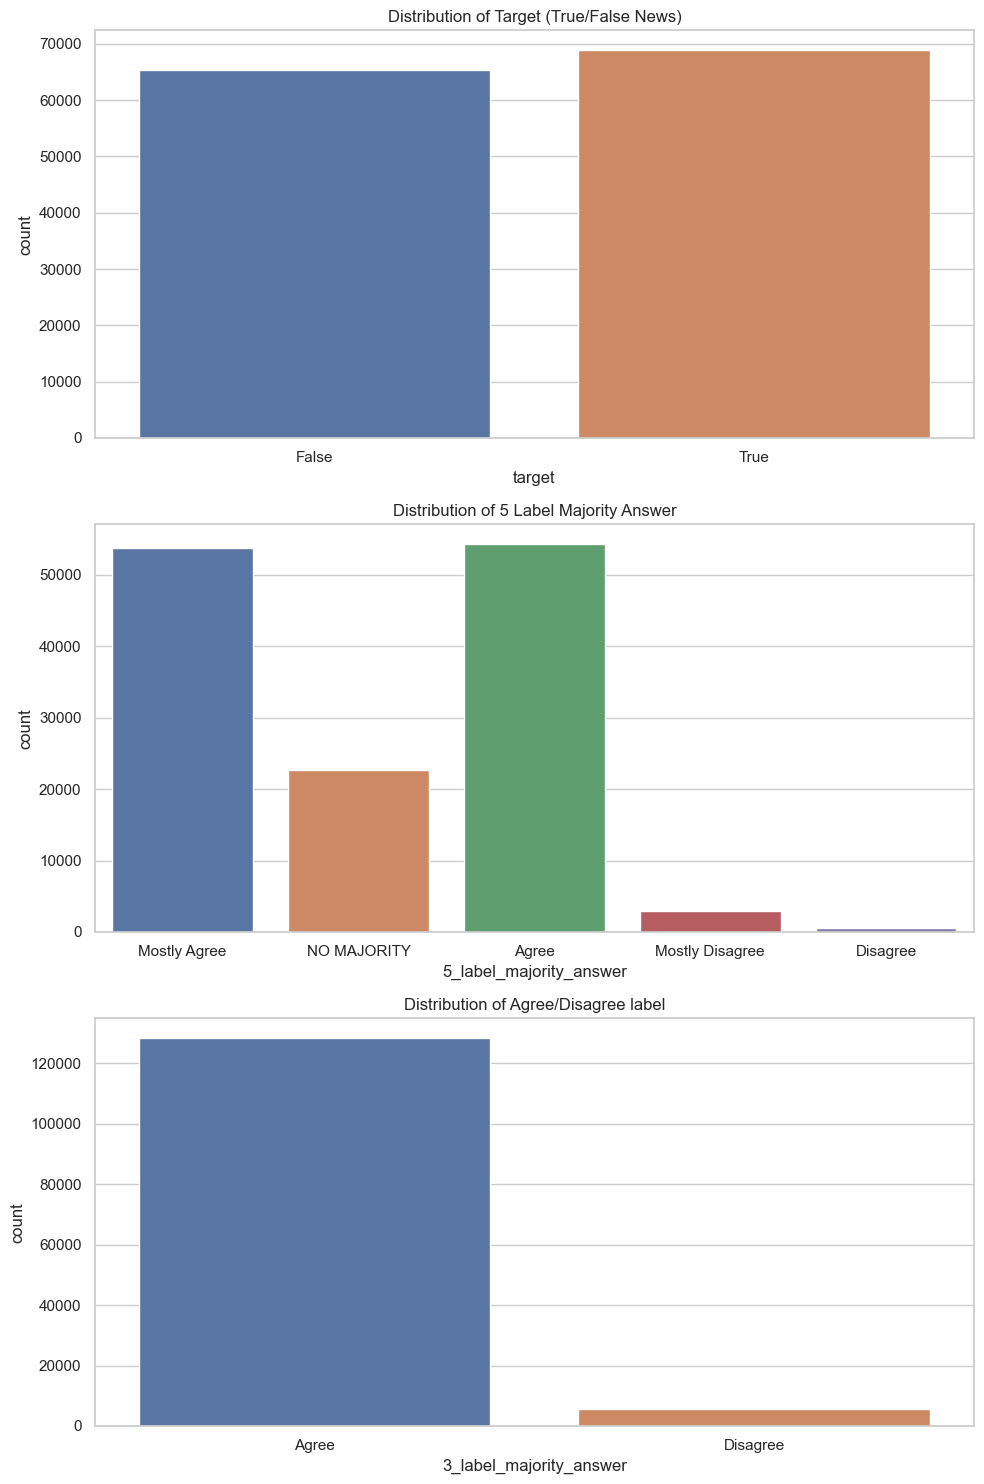

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of seaborn plot
sns.set(style="whitegrid")
# Create subplots
fig, ax =plt.subplots(3,1, figsize=(10,15))

# Bar plot for the distribution of target
sns.countplot(x="target", data=df, ax=ax[0])
ax[0].set_title('Distribution of Target (True/False News)')

# Bar plot for the distribution of 5_label_majority_answer
sns.countplot(x="5_label_majority_answer", data=df, ax=ax[1])
ax[1].set_title('Distribution of 5 Label Majority Answer')

# Bar plot for the distribution of 3_label_majority_answer
sns.countplot(x="3_label_majority_answer", data=df, ax=ax[2])
ax[2].set_title('Distribution of Agree/Disagree label')

plt.tight_layout()
plt.show()

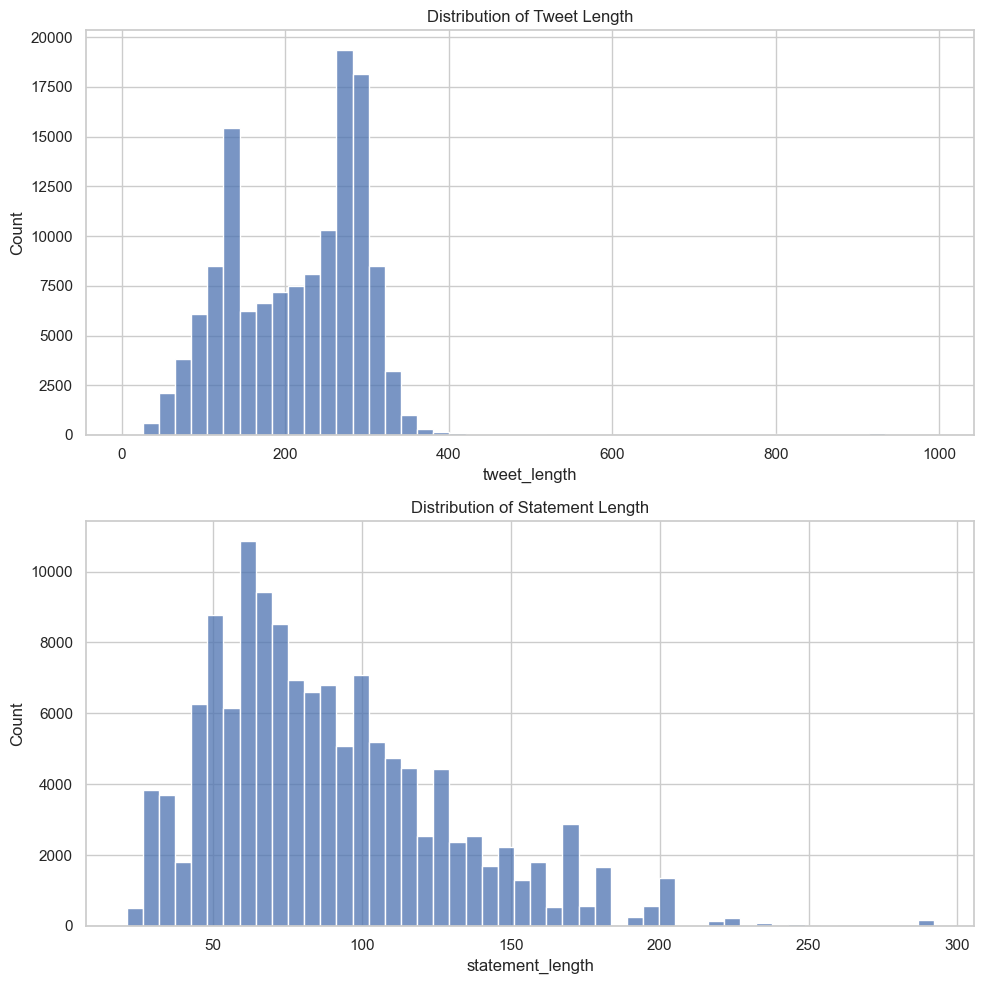

In [10]:
# Create new features for the length of 'tweet' and 'statement'
df['tweet_length'] = df['tweet'].apply(len)
df['statement_length'] = df['statement'].apply(len)

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Histogram for the distribution of tweet length
sns.histplot(df['tweet_length'], bins=50, ax=ax[0])
ax[0].set_title('Distribution of Tweet Length')

# Histogram for the distribution of statement length
sns.histplot(df['statement_length'], bins=50, ax=ax[1])
ax[1].set_title('Distribution of Statement Length')

plt.tight_layout()
plt.show()

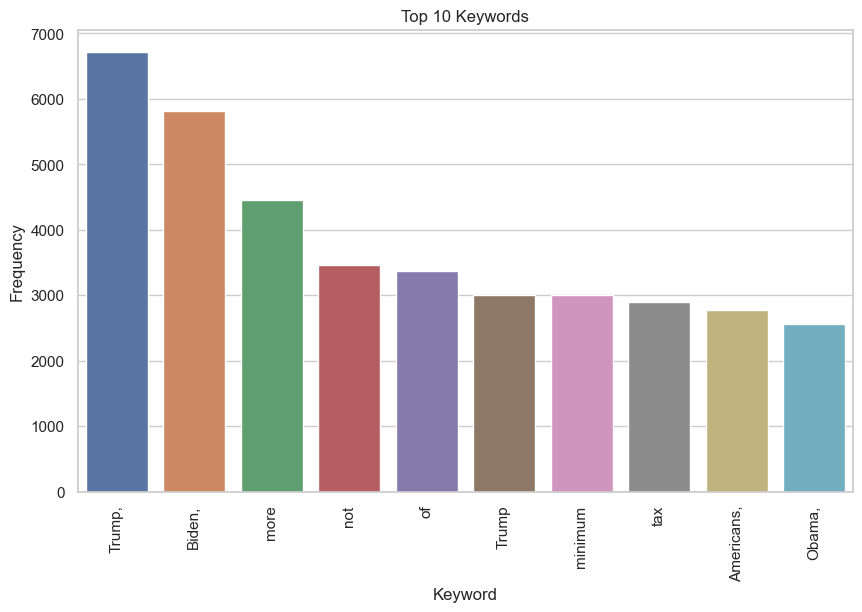

In [11]:
from collections import Counter

# Join all the keywords into a single string
all_keywords = ' '.join(df['manual_keywords'])

# Split the keywords into individual words
keywords_list = all_keywords.split()

# Count the frequency of each word
keywords_counts = Counter(keywords_list)

# Get the top 10 most common keywords
top_keywords = keywords_counts.most_common(10)

# Convert the list of tuples into a DataFrame for easy plotting
top_keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])

# Create a bar plot for the top 10 keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='Keyword', y='Frequency', data=top_keywords_df)
plt.title('Top 10 Keywords')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Keyword', fontsize=12)
plt.xticks(rotation=90)
plt.show()

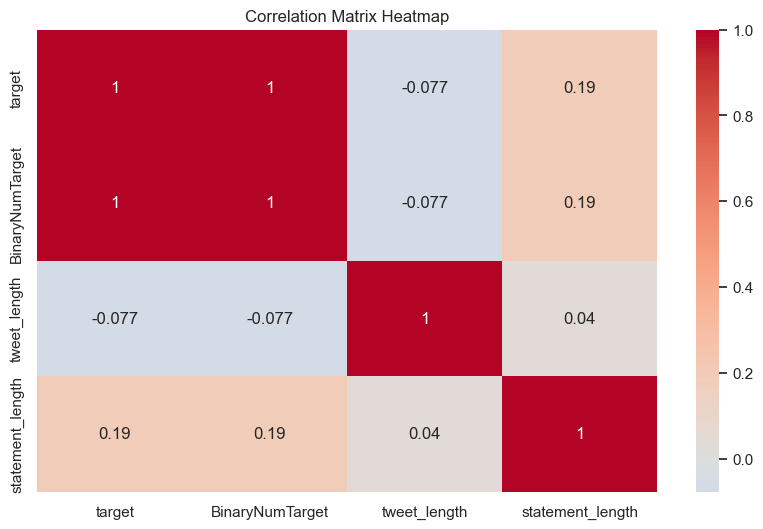

In [12]:
corr = df[['target', 'BinaryNumTarget', 'tweet_length', 'statement_length']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


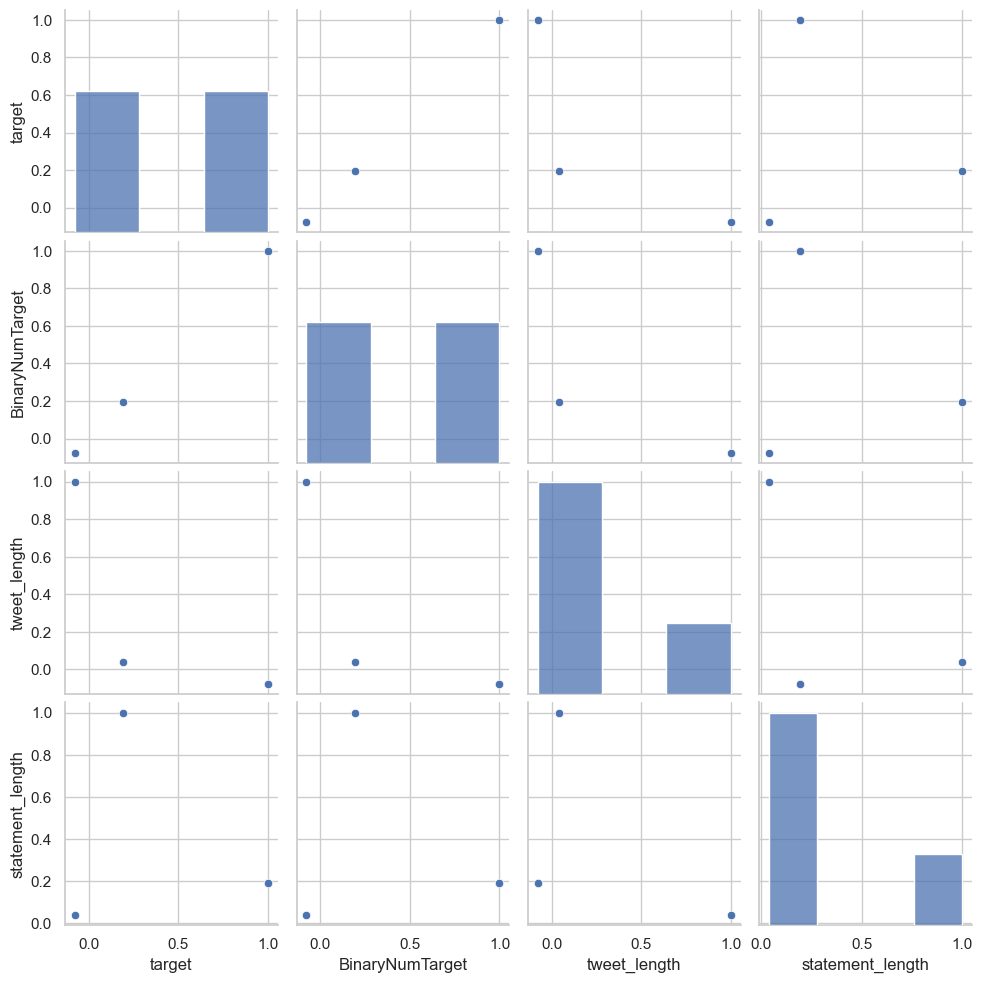

In [13]:
sns.pairplot(corr)

<Axes: >

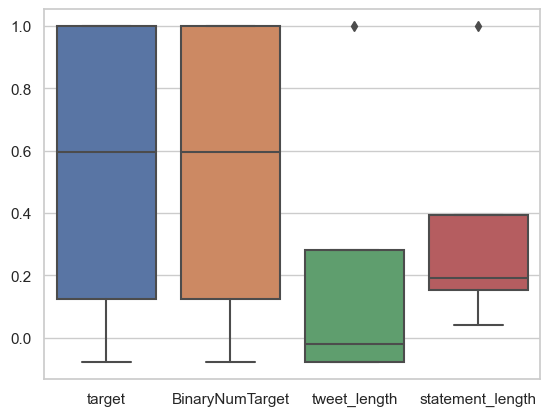

In [14]:
sns.boxplot(corr)

<Axes: >

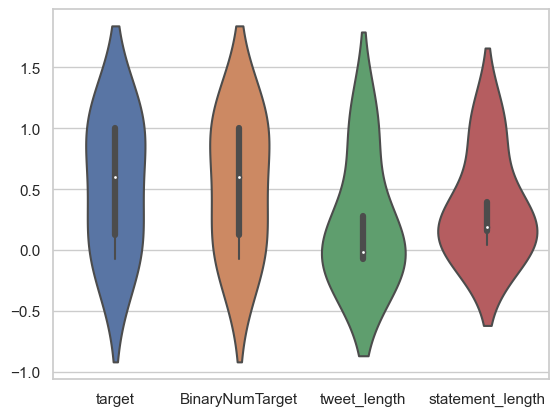

In [15]:
sns.violinplot(corr)

In [16]:
df1=df.loc[:,['statement','BinaryNumTarget','5_label_majority_answer','3_label_majority_answer']]

In [17]:
df1.sample(10)

statement  BinaryNumTarget  \
8766    Says Texas either is near the bottom or at the...              1.0   
85140   The southern U.S. border is now open to anyone...              0.0   
98588   The Biden administration lost 20 million COVID...              0.0   
20230   "There are currently 6 million jobs available ...              1.0   
123410  Says James Madison signed the Declaration of I...              0.0   
79922     "Michigan has requested a full forensic audit."              0.0   
94579   Says Jerry Nadler said God has no authority in...              0.0   
113849                       Biden admits to voter fraud.              0.0   
9199    Africans living in China now being forced to s...              1.0   
119584  Says John F. Kennedy said, "If a Supreme Court...              0.0   

       5_label_majority_answer 3_label_majority_answer  
8766              Mostly Agree                   Agree  
85140                    Agree                   Agree  
98588                    Agree                   Agree  
20230             Mostly Agree                   Agree  
123410                   Agree                   Agree  
79922              NO MAJORITY                   Agree  
94579             Mostly Agree                   Agree  
113849                   Agree                   Agree  
9199              Mostly Agree                   Agree  
119584             NO MAJORITY                   Agree

**Text Preprocessing**

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import stopwords

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
df1=df1.drop_duplicates()

In [1]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
wordnet = WordNetLemmatizer()

def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Convert to lowercase
    text = text.lower()

    # Remove special characters
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    words = [wordnet.lemmatize(word) for word in words]

    # Join the words back into a sentence
    preprocessed_text = ' '.join(words)

    return preprocessed_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
# Apply text cleaning to the 'text' column
df1['statement'] = df1['statement'].apply(preprocess_text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8056\1754322723.py:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [23]:
df1.head()

statement  BinaryNumTarget  \
0   end eviction moratorium mean million american ...              1.0   
1   end eviction moratorium mean million american ...              1.0   
2   end eviction moratorium mean million american ...              1.0   
15  end eviction moratorium mean million american ...              1.0   
48  end eviction moratorium mean million american ...              1.0   

   5_label_majority_answer 3_label_majority_answer  
0             Mostly Agree                   Agree  
1              NO MAJORITY                   Agree  
2                    Agree                   Agree  
15         Mostly Disagree                Disagree  
48             NO MAJORITY                Disagree

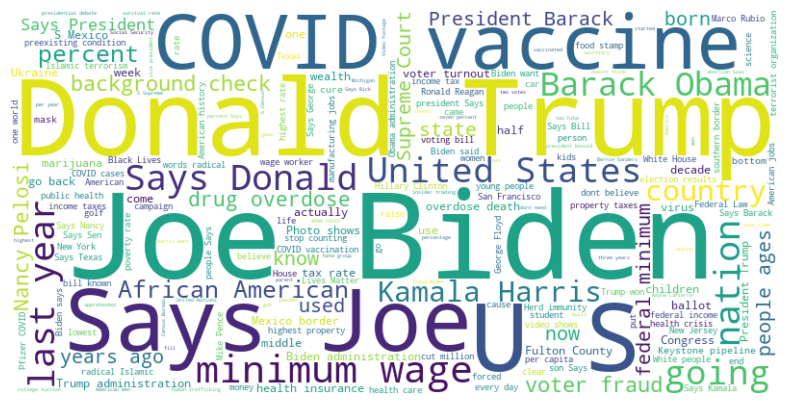

In [24]:
# Combine movie titles into a single string
from wordcloud import WordCloud
text = " ".join(df['statement'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Feature Extraction using Pretrained Text Model**

**Text embeddings based on feed-forward Neural-Net Language Models**

In [25]:
X=df1['statement']
y=df1['BinaryNumTarget']

In [26]:
def embed_text_data(df, hub_layer):
    train_examples = df['statement']
    train_labels = df['BinaryNumTarget']
    embedded_data = hub_layer(train_examples)

    columns = [f"embedding_{i + 1}" for i in range(embedded_data.shape[1])]
    X_df = pd.DataFrame(data=embedded_data.numpy(), columns=columns)

    return X_df, train_labels

In [27]:
import tensorflow as tf
import tensorflow_hub as hub

model = "https://tfhub.dev/google/nnlm-en-dim128/2"

hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)

embedding_df, y = embed_text_data(df, hub_layer)

In [28]:
X=embedding_df

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [30]:
X_train.shape

(85886, 128)

***To Build CNN-LSTM model for Classification***

In [69]:
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, GlobalMaxPooling1D
import tensorflow as tf
import keras
from keras.optimizers import Adam,RMSprop
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, LSTM, BatchNormalization, MaxPooling1D
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=7, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 122, 128)          1024      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 61, 128)           0         
 g1D)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 61, 64)            49408     
                                                                 
 flatten_9 (Flatten)         (None, 3904)              0         
                                                                 
 dense_21 (Dense)            (None, 1)                 3905      
                                                                 
Total params: 54337 (212.25 KB)
Trainable params: 54337 (212.25 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [70]:
from keras.callbacks import EarlyStopping
# Train the CNN model
# Measure the start time
import time
start_time = time.time()
history_CNN = model.fit(X_train, y_train, epochs = 5, batch_size = 512,validation_data=(X_val,y_val),shuffle=True)

# Measure the end time
end_time = time.time()

# Calculate the elapsed time
computation_time_CNN = end_time - start_time

# Print the elapsed time
print(f"Training took {computation_time_CNN} seconds.")


Epoch 1/5
168/168 [==============================] - 27s 144ms/step - loss: 0.5353 - accuracy: 0.7108 - val_loss: 0.3808 - val_accuracy: 0.8169
Epoch 2/5
168/168 [==============================] - 23s 139ms/step - loss: 0.2931 - accuracy: 0.8828 - val_loss: 0.2135 - val_accuracy: 0.9375
Epoch 3/5
168/168 [==============================] - 23s 136ms/step - loss: 0.1765 - accuracy: 0.9457 - val_loss: 0.2108 - val_accuracy: 0.9300
Epoch 4/5
168/168 [==============================] - 23s 136ms/step - loss: 0.1222 - accuracy: 0.9656 - val_loss: 0.1051 - val_accuracy: 0.9719
Epoch 5/5
168/168 [==============================] - 23s 137ms/step - loss: 0.0899 - accuracy: 0.9766 - val_loss: 0.1102 - val_accuracy: 0.9733
Training took 119.38326954841614 seconds.


In [71]:
model.save('CNN_LSTM_tex_embedd.keras')

In [72]:
from keras.models import load_model
model=load_model('CNN_LSTM_tex_embedd.keras')

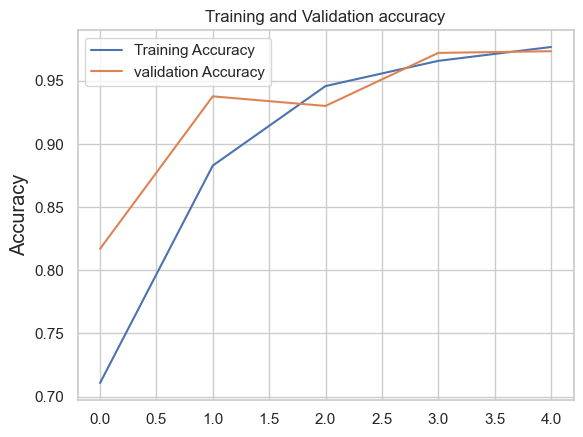

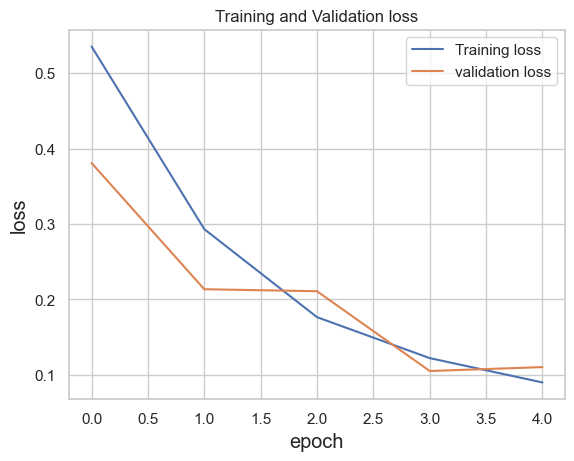

In [73]:
# Plot the changes in accuracy and loss over epochs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history["val_accuracy"])
plt.title("Training and Validation accuracy")
plt.ylabel('Accuracy', fontsize="large")
plt.legend(['Training Accuracy','validation Accuracy'])
plt.show()

plt.plot(history_CNN.history['loss'])
plt.plot(history_CNN.history["val_loss"])
plt.title("Training and Validation loss")
plt.ylabel("loss", fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(['Training loss','validation loss'])
plt.show()

In [74]:
# Make predictions on the test set
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score
from sklearn import metrics
import numpy as np
import seaborn as sns
y_pred_train = model.predict(X_train,batch_size=512)
y_pred_train = np.round(y_pred_train)
# Evaluate the model
train_acc = accuracy_score(y_train, y_pred_train)
y_pred_test = model.predict(X_test,batch_size=512)
y_pred_test = np.round(y_pred_test)
# Evaluate the model
test_acc = accuracy_score(y_test, y_pred_test)
y_pred_val = model.predict(X_val,batch_size=512)
y_pred_val = np.round(y_pred_val)
# Evaluate the model
val_acc = accuracy_score(y_val, y_pred_val)
print("Train Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)

42/42 [==============================] - 2s 54ms/step
Train Accuracy: 0.9744777961483827
Validation Accuracy: 0.9732675111773472
Test Accuracy: 0.9746646795827124


In [75]:
y_test.value_counts()

BinaryNumTarget
1.0    13764
0.0    13076
Name: count, dtype: int64

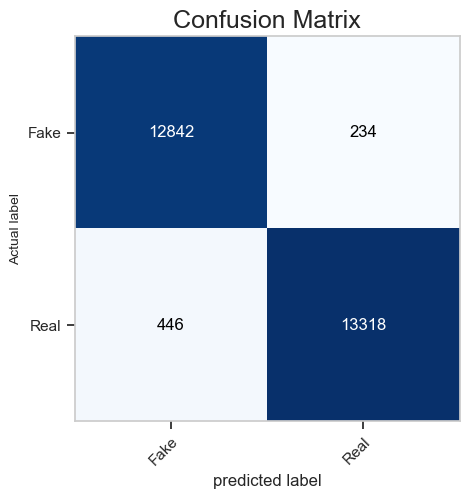

In [76]:
conf_matrix = confusion_matrix(y_test,y_pred_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(5, 5), cmap=plt.cm.Blues,class_names=['Fake','Real'])
plt.ylabel('Actual label', fontsize=10)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [77]:
print('Classification Report')
print(classification_report(y_test,y_pred_test))
# accuracy: (tp + tn) / (p + n)
CNN_LSTM_accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy: %f' % CNN_LSTM_accuracy)
# precision: tp / (tp + fp)
CNN_LSTM_precision = precision_score(y_test,y_pred_test,average='weighted')
print('Precision: %f' % CNN_LSTM_precision)
# recall: tp / (tp + fn)
CNN_LSTM_recall = recall_score(y_test,y_pred_test,average='weighted')
print('Recall: %f' % CNN_LSTM_recall)
# Sensitivity/TPR=TP/TP+FN-It tells us what proportion of the positive class got correctly classified.
CNN_LSTM_sensitivity=conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[1,0])
print('Sensitivity: %f' % CNN_LSTM_sensitivity)
# specificity: TN / float(TN+FP)
CNN_LSTM_specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print('Specificity: %f' % CNN_LSTM_specificity)
# f1: 2 tp / (2 tp + fp + fn)
# FMeasure = (2 * Precision * Recall) / (Precision + Recall)
CNN_LSTM_f1_score = f1_score(y_test,y_pred_test,average='weighted')
print('F1-Score: %f' % CNN_LSTM_f1_score)

Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     13076
         1.0       0.98      0.97      0.98     13764

    accuracy                           0.97     26840
   macro avg       0.97      0.97      0.97     26840
weighted avg       0.97      0.97      0.97     26840

Accuracy: 0.974665
Precision: 0.974793
Recall: 0.974665
Sensitivity: 0.967597
Specificity: 0.982105
F1-Score: 0.974668


***CNN-Bidirectional LSTM for Sentiment classification***

In [84]:
from keras.layers import Bidirectional
import tensorflow as tf
import keras
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, LSTM, BatchNormalization, MaxPooling1D

model = Sequential()
model.add(Conv1D(filters=128, kernel_size=7, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 122, 128)          1024      
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 61, 128)           0         
 g1D)                                                            
                                                                 
 bidirectional_2 (Bidirecti  (None, 61, 32)            18560     
 onal)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 1952)              0         
                                                                 
 dense_24 (Dense)            (None, 1)                 1953      
                                                                 
Total params: 21537 (84.13 KB)
Trainable params: 2153

In [85]:
X_train.shape

(85886, 128)

In [86]:
from keras.callbacks import EarlyStopping
# Train the CNN model
# Measure the start time
import time
start_time = time.time()
history_BiLSTM=model.fit(X_train, y_train, epochs = 5, batch_size = 512,validation_data=(X_val,y_val),shuffle=True)
# Measure the end time
end_time = time.time()

# Calculate the elapsed time
computation_time_BiLSTM = end_time - start_time
# Print the elapsed time
print(f"Training took {computation_time_BiLSTM} seconds.")

Epoch 1/5
168/168 [==============================] - 24s 116ms/step - loss: 0.5474 - accuracy: 0.7057 - val_loss: 0.3784 - val_accuracy: 0.8106
Epoch 2/5
168/168 [==============================] - 20s 116ms/step - loss: 0.2553 - accuracy: 0.9048 - val_loss: 0.1749 - val_accuracy: 0.9459
Epoch 3/5
168/168 [==============================] - 20s 117ms/step - loss: 0.1564 - accuracy: 0.9518 - val_loss: 0.1078 - val_accuracy: 0.9740
Epoch 4/5
168/168 [==============================] - 19s 116ms/step - loss: 0.0975 - accuracy: 0.9749 - val_loss: 0.1103 - val_accuracy: 0.9639
Epoch 5/5
168/168 [==============================] - 20s 117ms/step - loss: 0.0762 - accuracy: 0.9808 - val_loss: 0.0779 - val_accuracy: 0.9780
Training took 102.18121981620789 seconds.


In [87]:
model.save('CNN_BiLSTM_text_embed1.keras')

In [88]:
from keras.models import load_model
model=load_model('CNN_BiLSTM_text_embed1.keras')

In [89]:
# Make predictions on the test set
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score
from sklearn import metrics
import numpy as np
import seaborn as sns
y_pred_train = model.predict(X_train,batch_size=512)
y_pred_train = np.round(y_pred_train)
# Evaluate the model
train_acc = accuracy_score(y_train, y_pred_train)
y_pred_test = model.predict(X_test,batch_size=512)
y_pred_test = np.round(y_pred_test)
# Evaluate the model
test_acc = accuracy_score(y_test, y_pred_test)
y_pred_val = model.predict(X_val,batch_size=512)
y_pred_val = np.round(y_pred_val)
# Evaluate the model
val_acc = accuracy_score(y_val, y_pred_val)
print("Train Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)

42/42 [==============================] - 2s 41ms/step
Train Accuracy: 0.9779242251356449
Validation Accuracy: 0.9779713114754098
Test Accuracy: 0.9769001490312966


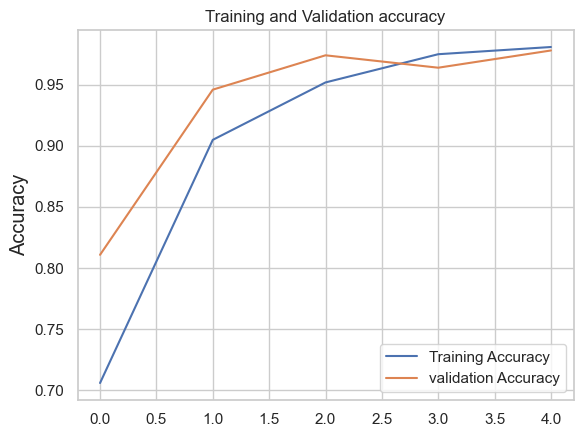

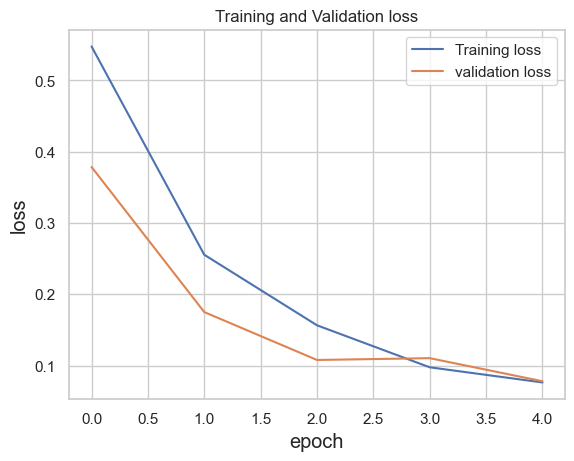

In [90]:
# Plot the changes in accuracy and loss over epochs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.plot(history_BiLSTM.history['accuracy'])
plt.plot(history_BiLSTM.history["val_accuracy"])
plt.title("Training and Validation accuracy")
plt.ylabel('Accuracy', fontsize="large")
plt.legend(['Training Accuracy','validation Accuracy'])
plt.show()

plt.plot(history_BiLSTM.history['loss'])
plt.plot(history_BiLSTM.history["val_loss"])
plt.title("Training and Validation loss")
plt.ylabel("loss", fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(['Training loss','validation loss'])
plt.show()

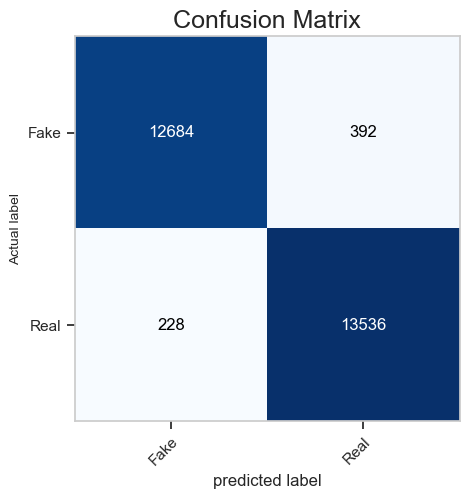

In [91]:
#To plot the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(5, 5), cmap=plt.cm.Blues,class_names=['Fake','Real'])
plt.ylabel('Actual label', fontsize=10)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [92]:
print('Classification Report')
print(classification_report(y_test,y_pred_test))
# accuracy: (tp + tn) / (p + n)
CNN_BiLSTM_accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy: %f' % CNN_BiLSTM_accuracy)
# precision: tp / (tp + fp)
CNN_BiLSTM_precision = precision_score(y_test,y_pred_test,average='weighted')
print('Precision: %f' % CNN_BiLSTM_precision)
# recall: tp / (tp + fn)
CNN_BiLSTM_recall = recall_score(y_test,y_pred_test,average='weighted')
print('Recall: %f' % CNN_BiLSTM_recall)
# Sensitivity/TPR=TP/TP+FN-It tells us what proportion of the positive class got correctly classified.
CNN_BiLSTM_sensitivity=conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[1,0])
print('Sensitivity: %f' % CNN_BiLSTM_sensitivity)
# specificity: TN / float(TN+FP)
CNN_BiLSTM_specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print('Specificity: %f' % CNN_BiLSTM_specificity)
# f1: 2 tp / (2 tp + fp + fn)
# FMeasure = (2 * Precision * Recall) / (Precision + Recall)
CNN_BiLSTM_f1_score = f1_score(y_test,y_pred_test,average='weighted')
print('F1-Score: %f' % CNN_BiLSTM_f1_score)

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     13076
         1.0       0.97      0.98      0.98     13764

    accuracy                           0.98     26840
   macro avg       0.98      0.98      0.98     26840
weighted avg       0.98      0.98      0.98     26840

Accuracy: 0.976900
Precision: 0.976964
Recall: 0.976900
Sensitivity: 0.983435
Specificity: 0.970021
F1-Score: 0.976896


**CNN-GRU classification Model**

In [31]:
X_train.shape

(85886, 128)

In [38]:
from keras.layers import Bidirectional
import tensorflow as tf
import keras
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, LSTM, BatchNormalization, MaxPooling1D,GRU

model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(GRU(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 127, 256)          768       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 63, 256)           0         
 g1D)                                                            
                                                                 
 gru_2 (GRU)                 (None, 63, 32)            27840     
                                                                 
 flatten_2 (Flatten)         (None, 2016)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2017      
                                                                 
Total params: 30625 (119.63 KB)
Trainable params: 30625 (119.63 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [39]:
X_train.shape

(85886, 128)

In [40]:
from keras.callbacks import EarlyStopping
# Train the CNN model
# Measure the start time
import time
start_time = time.time()
history_GRU=model.fit(X_train, y_train, epochs = 5, batch_size = 64,validation_data=(X_val,y_val),shuffle=True)
# Measure the end time
end_time = time.time()
# Calculate the elapsed time
computation_time_gru = end_time - start_time
# Print the elapsed time
print(f"Training took {computation_time_gru} seconds.")

Epoch 1/5
1342/1342 [==============================] - 40s 28ms/step - loss: 0.5584 - accuracy: 0.6948 - val_loss: 0.4298 - val_accuracy: 0.7825
Epoch 2/5
1342/1342 [==============================] - 33s 25ms/step - loss: 0.3716 - accuracy: 0.8314 - val_loss: 0.3210 - val_accuracy: 0.8656
Epoch 3/5
1342/1342 [==============================] - 34s 25ms/step - loss: 0.2817 - accuracy: 0.8984 - val_loss: 0.2438 - val_accuracy: 0.9265
Epoch 4/5
1342/1342 [==============================] - 34s 26ms/step - loss: 0.2142 - accuracy: 0.9340 - val_loss: 0.1852 - val_accuracy: 0.9445
Epoch 5/5
1342/1342 [==============================] - 34s 26ms/step - loss: 0.1606 - accuracy: 0.9540 - val_loss: 0.1373 - val_accuracy: 0.9666
Training took 175.40225267410278 seconds.


In [41]:
model.save('CNN_GRU_text_embed1.keras')

In [42]:
from keras.models import load_model
model=load_model('CNN_GRU_text_embed1.keras')

In [43]:
# Make predictions on the test set
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score
from sklearn import metrics
import numpy as np
import seaborn as sns
y_pred_train = model.predict(X_train,batch_size=512)
y_pred_train = np.round(y_pred_train)
# Evaluate the model
train_acc = accuracy_score(y_train, y_pred_train)
y_pred_test = model.predict(X_test,batch_size=512)
y_pred_test = np.round(y_pred_test)
# Evaluate the model
test_acc = accuracy_score(y_test, y_pred_test)
y_pred_val = model.predict(X_val,batch_size=512)
y_pred_val = np.round(y_pred_val)
# Evaluate the model
val_acc = accuracy_score(y_val, y_pred_val)
print("Train Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)

42/42 [==============================] - 2s 49ms/step
Train Accuracy: 0.96667675756235
Validation Accuracy: 0.9666076751117735
Test Accuracy: 0.9663189269746647


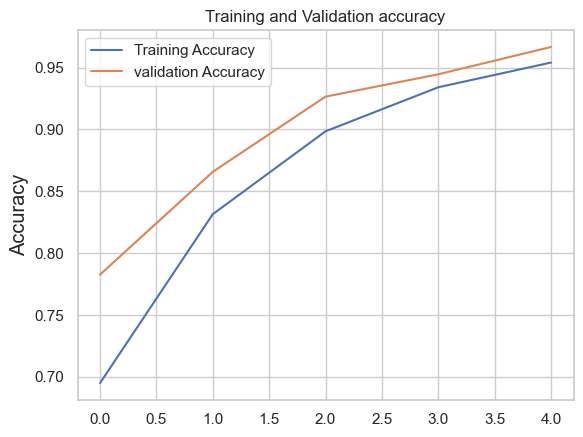

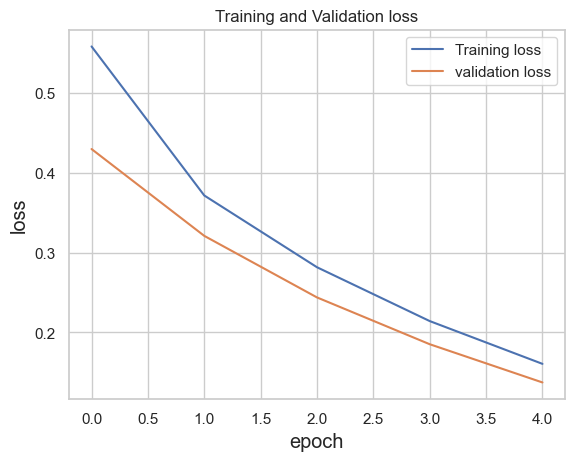

In [45]:
# Plot the changes in accuracy and loss over epochs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.plot(history_GRU.history['accuracy'])
plt.plot(history_GRU.history["val_accuracy"])
plt.title("Training and Validation accuracy")
plt.ylabel('Accuracy', fontsize="large")
plt.legend(['Training Accuracy','validation Accuracy'])
plt.show()

plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history["val_loss"])
plt.title("Training and Validation loss")
plt.ylabel("loss", fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(['Training loss','validation loss'])
plt.show()

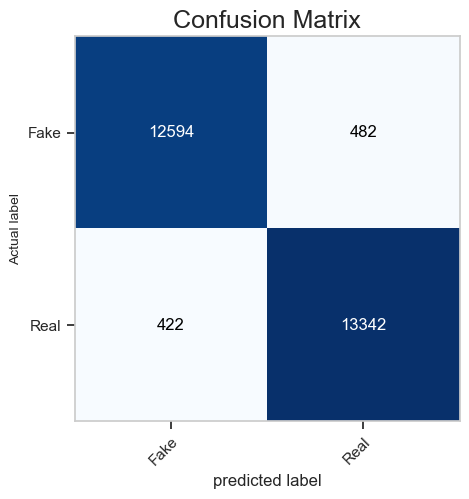

In [46]:
#To plot the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(5, 5), cmap=plt.cm.Blues,class_names=['Fake','Real'])
plt.ylabel('Actual label', fontsize=10)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [47]:
print('Classification Report')
print(classification_report(y_test,y_pred_test))
# accuracy: (tp + tn) / (p + n)
CNN_GRU_accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy: %f' % CNN_GRU_accuracy)
# precision: tp / (tp + fp)
CNN_GRU_precision = precision_score(y_test,y_pred_test,average='weighted')
print('Precision: %f' % CNN_GRU_precision)
# recall: tp / (tp + fn)
CNN_GRU_recall = recall_score(y_test,y_pred_test,average='weighted')
print('Recall: %f' % CNN_GRU_recall)
# Sensitivity/TPR=TP/TP+FN-It tells us what proportion of the positive class got correctly classified.
CNN_GRU_sensitivity=conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[1,0])
print('Sensitivity: %f' % CNN_GRU_sensitivity)
# specificity: TN / float(TN+FP)
CNN_BiGRU_specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print('Specificity: %f' % CNN_BiGRU_specificity)
# f1: 2 tp / (2 tp + fp + fn)
# FMeasure = (2 * Precision * Recall) / (Precision + Recall)
CNN_GRU_f1_score = f1_score(y_test,y_pred_test,average='weighted')
print('F1-Score: %f' % CNN_GRU_f1_score)

Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97     13076
         1.0       0.97      0.97      0.97     13764

    accuracy                           0.97     26840
   macro avg       0.97      0.97      0.97     26840
weighted avg       0.97      0.97      0.97     26840

Accuracy: 0.966319
Precision: 0.966324
Recall: 0.966319
Sensitivity: 0.969340
Specificity: 0.963139
F1-Score: 0.966317


**CNN-BiGRU classification Model**

In [177]:
from keras.layers import Bidirectional
import tensorflow as tf
import keras
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten, LSTM, BatchNormalization, MaxPooling1D,GRU

model = Sequential()
model.add(Conv1D(filters=128, kernel_size=7, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(GRU(32, return_sequences=True)))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_25 (Conv1D)          (None, 122, 128)          1024      
                                                                 
 max_pooling1d_25 (MaxPooli  (None, 61, 128)           0         
 ng1D)                                                           
                                                                 
 bidirectional_21 (Bidirect  (None, 61, 64)            31104     
 ional)                                                          
                                                                 
 flatten_31 (Flatten)        (None, 3904)              0         
                                                                 
 dense_43 (Dense)            (None, 1)                 3905      
                                                                 
Total params: 36033 (140.75 KB)
Trainable params: 360

In [178]:
X_train.shape

(85886, 128)

In [179]:
from keras.callbacks import EarlyStopping
# Train the CNN model
# Measure the start time
import time
start_time = time.time()
history_BiGRU=model.fit(X_train, y_train, epochs = 5, batch_size = 128,validation_data=(X_val,y_val),shuffle=True)
# Measure the end time
end_time = time.time()
# Calculate the elapsed time
computation_time_bigru = end_time - start_time
# Print the elapsed time
print(f"Training took {computation_time_bigru} seconds.")

Epoch 1/5
671/671 [==============================] - 38s 50ms/step - loss: 0.6087 - accuracy: 0.6599 - val_loss: 0.4987 - val_accuracy: 0.7418
Epoch 2/5
671/671 [==============================] - 34s 50ms/step - loss: 0.4215 - accuracy: 0.7896 - val_loss: 0.3510 - val_accuracy: 0.8426
Epoch 3/5
671/671 [==============================] - 37s 55ms/step - loss: 0.3032 - accuracy: 0.8794 - val_loss: 0.2606 - val_accuracy: 0.9109
Epoch 4/5
671/671 [==============================] - 35s 52ms/step - loss: 0.2325 - accuracy: 0.9245 - val_loss: 0.2050 - val_accuracy: 0.9292
Epoch 5/5
671/671 [==============================] - 34s 51ms/step - loss: 0.1884 - accuracy: 0.9458 - val_loss: 0.1705 - val_accuracy: 0.9545
Training took 177.45867776870728 seconds.


In [180]:
model.save('CNN_BiGRU_text_embed1.keras')

In [181]:
from keras.models import load_model
model=load_model('CNN_BiGRU_text_embed1.keras')

In [182]:
# Make predictions on the test set
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score
from sklearn import metrics
import numpy as np
import seaborn as sns
y_pred_train = model.predict(X_train,batch_size=512)
y_pred_train = np.round(y_pred_train)
# Evaluate the model
train_acc = accuracy_score(y_train, y_pred_train)
y_pred_test = model.predict(X_test,batch_size=512)
y_pred_test = np.round(y_pred_test)
# Evaluate the model
test_acc = accuracy_score(y_test, y_pred_test)
y_pred_val = model.predict(X_val,batch_size=512)
y_pred_val = np.round(y_pred_val)
# Evaluate the model
val_acc = accuracy_score(y_val, y_pred_val)
print("Train Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)

42/42 [==============================] - 5s 112ms/step
Train Accuracy: 0.9556854434948653
Validation Accuracy: 0.9545454545454546
Test Accuracy: 0.9539493293591654


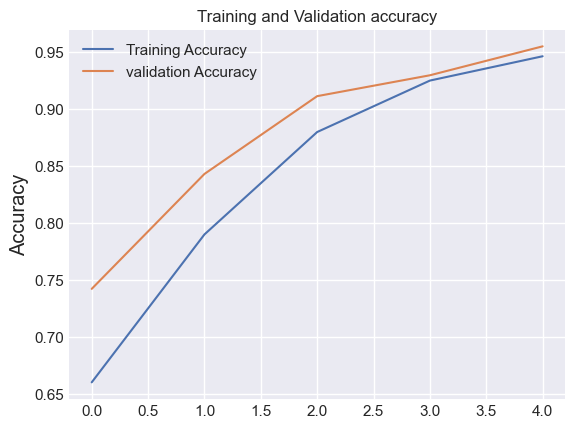

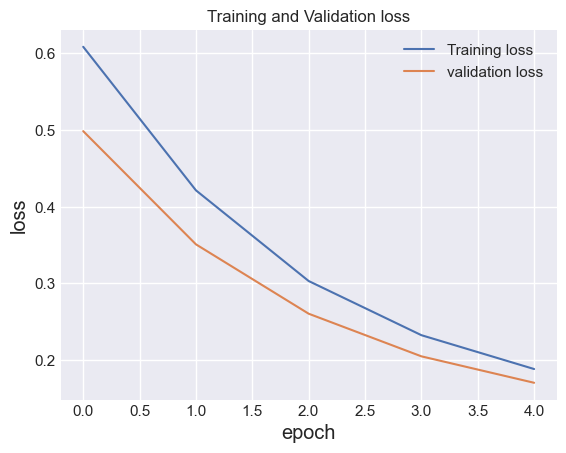

In [183]:
# Plot the changes in accuracy and loss over epochs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.plot(history_BiGRU.history['accuracy'])
plt.plot(history_BiGRU.history["val_accuracy"])
plt.title("Training and Validation accuracy")
plt.ylabel('Accuracy', fontsize="large")
plt.legend(['Training Accuracy','validation Accuracy'])
plt.show()

plt.plot(history_BiGRU.history['loss'])
plt.plot(history_BiGRU.history["val_loss"])
plt.title("Training and Validation loss")
plt.ylabel("loss", fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(['Training loss','validation loss'])
plt.show()

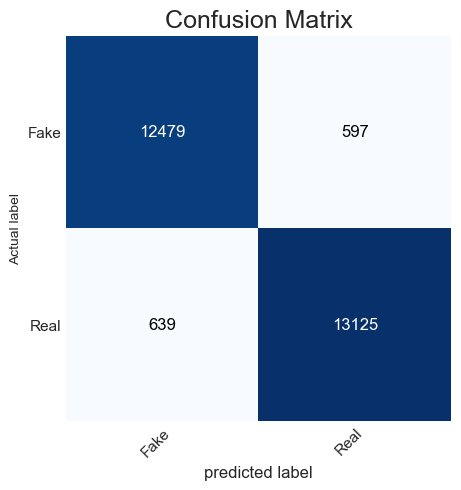

In [184]:
#To plot the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(5, 5), cmap=plt.cm.Blues,class_names=['Fake','Real'])
plt.ylabel('Actual label', fontsize=10)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [185]:
print('Classification Report')
print(classification_report(y_test,y_pred_test))
# accuracy: (tp + tn) / (p + n)
CNN_BiGRU_accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy: %f' % CNN_BiGRU_accuracy)
# precision: tp / (tp + fp)
CNN_BiGRU_precision = precision_score(y_test,y_pred_test,average='weighted')
print('Precision: %f' % CNN_BiGRU_precision)
# recall: tp / (tp + fn)
CNN_BiGRU_recall = recall_score(y_test,y_pred_test,average='weighted')
print('Recall: %f' % CNN_BiGRU_recall)
# Sensitivity/TPR=TP/TP+FN-It tells us what proportion of the positive class got correctly classified.
CNN_BiGRU_sensitivity=conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[1,0])
print('Sensitivity: %f' % CNN_BiGRU_sensitivity)
# specificity: TN / float(TN+FP)
CNN_BiGRU_specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print('Specificity: %f' % CNN_BiGRU_specificity)
# f1: 2 tp / (2 tp + fp + fn)
# FMeasure = (2 * Precision * Recall) / (Precision + Recall)
CNN_BiGRU_f1_score = f1_score(y_test,y_pred_test,average='weighted')
print('F1-Score: %f' % CNN_BiGRU_f1_score)

Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     13076
         1.0       0.96      0.95      0.96     13764

    accuracy                           0.95     26840
   macro avg       0.95      0.95      0.95     26840
weighted avg       0.95      0.95      0.95     26840

Accuracy: 0.953949
Precision: 0.953957
Recall: 0.953949
Sensitivity: 0.953575
Specificity: 0.954344
F1-Score: 0.953951


# Fake news classification using Coyote Optimization Algorithm (COA) with CNN-BIGRU  Classifier

**Fake news classification using CanineNet NewsSentinel**

**Canine:** The term "Canine" refers to the family of mammals that includes dogs, wolves, and coyotes. In this context, "Canine" symbolizes the animalistic nature of the coyote, known for its adaptability and intelligence in finding solutions. This aligns with the optimization aspect of the Coyote Optimization Algorithm (COA), which mimics the hunting behavior of coyotes to find optimal solutions in complex search spaces.

**Net:** The term "Net" is a common abbreviation for "network," which is a fundamental concept in neural networks. In this context, "Net" represents the neural network architecture used in your approach, specifically the Convolutional Neural Network (CNN) and Bidirectional Gated Recurrent Unit (BIGRU). These components are crucial for processing and analyzing the data in your model.

**NewsSentinel:** This part of the name conveys the idea of a guardian or protector of news. A sentinel is a lookout or guard, suggesting that the system is vigilant and watchful over news content. It implies that the system is actively monitoring and filtering news for authenticity and accuracy.

In [23]:
cd mealpy/

D:\Arul-Projects\41236\final_work\mealpy


In [24]:
from mealpy.swarm_based.COA import OriginalCOA

In [25]:
import numpy as np
import tensorflow as tf
import keras
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Conv1D, Dense, Dropout, Flatten, LSTM, BatchNormalization, MaxPooling1D,GRU
import mealpy
def fitness_function(solution):
    print('solution',solution)
    filter_size,kernel_size,pool_size,lstm_filter = round(solution[0]),round(solution[1]),round(solution[2]),round(solution[3])
    model = Sequential()
    model.add(Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Bidirectional(GRU(lstm_filter, return_sequences=True)))
    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs = 2, batch_size = 128,validation_data=(X_val,y_val),shuffle=True)
    y_pred_test = model.predict(X_test,batch_size=128)
    y_pred_test = np.round(y_pred_test)
    # Evaluate the model
    test_acc = accuracy_score(y_test, y_pred_test)
    print('test_acc',test_acc)
    return test_acc
    
problem_dict1 = {
    "fit_func": fitness_function,
     "lb": [16, 2, 1, 16],
     "ub": [256, 5, 2, 128],
    "minmax": "min",
 }

epoch = 2
pop_size = 10
n_coyotes = 5
model = OriginalCOA(epoch, pop_size, n_coyotes)
best_position, best_fitness = model.solve(problem_dict1)
print(f"Solution: {best_position}, Fitness: {best_fitness}")

solution [38.69996191  3.0582857   1.648926   32.25925169]



Epoch 1/2



671/671 [==============================] - 24s 27ms/step - loss: 0.3161 - accuracy: 0.8592 - val_loss: 0.0999 - val_accuracy: 0.9702
Epoch 2/2
210/210 [==============================] - 3s 8ms/step


INFO:mealpy.swarm_based.COA.OriginalCOA:Solving single objective optimization problem.


test_acc 0.9951564828614009
solution [114.05913007   2.62934801   1.14547861 110.83549254]
Epoch 1/2
671/671 [==============================] - 218s 318ms/step - loss: 0.1672 - accuracy: 0.9370 - val_loss: 0.0248 - val_accuracy: 0.9945
Epoch 2/2
210/210 [==============================] - 15s 67ms/step
test_acc 0.998919523099851
solution [ 42.62724453   3.87212911   1.55350015 106.05119812]
Epoch 1/2
671/671 [==============================] - 59s 81ms/step - loss: 0.2257 - accuracy: 0.9022 - val_loss: 0.0404 - val_accuracy: 0.9914
Epoch 2/2
210/210 [==============================] - 6s 25ms/step
test_acc 0.9935916542473919
solution [140.02305417   2.73798826   1.3441804   80.51218622]
Epoch 1/2
671/671 [==============================] - 201s 292ms/step - loss: 0.1680 - accuracy: 0.9365 - val_loss: 0.0203 - val_accuracy: 0.9959
Epoch 2/2
210/210 [==============================] - 15s 69ms/step
test_acc 0.9986959761549925
solution [157.57803789   4.91578053   1.20251816  67.72011412]
Epoc

INFO:mealpy.swarm_based.COA.OriginalCOA:>Problem: P, Epoch: 1, Current best: 0.9869225037257824, Global best: 0.9869225037257824, Runtime: 2395.56531 seconds


test_acc 0.9979135618479881
solution [16.        3.006081  2.       16.      ]
Epoch 1/2
671/671 [==============================] - 62s 56ms/step - loss: 0.3873 - accuracy: 0.8260 - val_loss: 0.2078 - val_accuracy: 0.9271
Epoch 2/2
210/210 [==============================] - 9s 18ms/step
test_acc 0.9775707898658719
solution [16.          5.          2.         99.19455138]
Epoch 1/2
671/671 [==============================] - 200s 266ms/step - loss: 0.2709 - accuracy: 0.8826 - val_loss: 0.0938 - val_accuracy: 0.9757
Epoch 2/2
210/210 [==============================] - 11s 47ms/step
test_acc 0.994709388971684
solution [75.47333303  5.          2.         16.        ]
Epoch 1/2
671/671 [==============================] - 43s 57ms/step - loss: 0.3154 - accuracy: 0.8595 - val_loss: 0.1250 - val_accuracy: 0.9646
Epoch 2/2
210/210 [==============================] - 5s 20ms/step
test_acc 0.9896795827123696
solution [29.27776586  5.          2.         84.32589865]
Epoch 1/2
671/671 [============

INFO:mealpy.swarm_based.COA.OriginalCOA:>Problem: P, Epoch: 2, Current best: 0.9775707898658719, Global best: 0.9775707898658719, Runtime: 2011.19803 seconds


Solution: [16.        3.006081  2.       16.      ], Fitness: 0.9775707898658719


In [26]:
best_position=best_position
best_position 

array([16.      ,  3.006081,  2.      , 16.      ])

In [114]:
best_position=[16.,3.006081,2.,16.]

In [117]:
x=best_position
filter_size,kernel_size,pool_size,lstm_filter = round(best_position[0]),round(best_position[1]),round(best_position[2]),round(best_position[3])
model = Sequential()
model.add(Conv1D(filters=filter_size, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Bidirectional(GRU(lstm_filter, return_sequences=True)))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 126, 16)           64        
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 63, 16)            0         
 ng1D)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 63, 32)            3264      
 onal)                                                           
                                                                 
 flatten_19 (Flatten)        (None, 2016)              0         
                                                                 
 dense_31 (Dense)            (None, 1)                 2017      
                                                                 
Total params: 5345 (20.88 KB)
Trainable params: 5345 

In [118]:
from keras.callbacks import EarlyStopping
# Train the CNN model
# Measure the start time
import time
start_time = time.time()
history_novelty=model.fit(X_train, y_train, epochs = 5, batch_size = 128,validation_data=(X_val,y_val),shuffle=True)
# Measure the end time
end_time = time.time()

# Calculate the elapsed time
computation_time_novelty = end_time - start_time

# Print the elapsed time
print(f"Training took {computation_time_novelty} seconds.")

Epoch 1/5
671/671 [==============================] - 21s 22ms/step - loss: 0.4077 - accuracy: 0.8068 - val_loss: 0.2384 - val_accuracy: 0.9309
Epoch 2/5
671/671 [==============================] - 13s 19ms/step - loss: 0.1550 - accuracy: 0.9561 - val_loss: 0.0898 - val_accuracy: 0.9767
Epoch 3/5
671/671 [==============================] - 13s 19ms/step - loss: 0.0610 - accuracy: 0.9849 - val_loss: 0.0403 - val_accuracy: 0.9921
Epoch 4/5
671/671 [==============================] - 12s 19ms/step - loss: 0.0287 - accuracy: 0.9943 - val_loss: 0.0209 - val_accuracy: 0.9964
Epoch 5/5
671/671 [==============================] - 13s 19ms/step - loss: 0.0163 - accuracy: 0.9973 - val_loss: 0.0134 - val_accuracy: 0.9979
Training took 71.01864409446716 seconds.


In [119]:
model.save('CNN_hybrid_BiLSTM_text_embed.keras')

In [120]:
from keras.models import load_model
model=load_model('CNN_hybrid_BiLSTM_text_embed.keras')

In [121]:
# Make predictions on the test set
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,f1_score
from sklearn import metrics
import numpy as np
import seaborn as sns
y_pred_train = model.predict(X_train,batch_size=512)
y_pred_train = np.round(y_pred_train)
# Evaluate the model
train_acc = accuracy_score(y_train, y_pred_train)
y_pred_test = model.predict(X_test,batch_size=512)
y_pred_test = np.round(y_pred_test)
# Evaluate the model
test_acc = accuracy_score(y_test, y_pred_test)
y_pred_val = model.predict(X_val,batch_size=512)
y_pred_val = np.round(y_pred_val)
# Evaluate the model
val_acc = accuracy_score(y_val, y_pred_val)
print("Train Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)
print("Test Accuracy:", test_acc)

42/42 [==============================] - 2s 46ms/step
Train Accuracy: 0.9984747223063131
Validation Accuracy: 0.9979042473919523
Test Accuracy: 0.9976900149031297


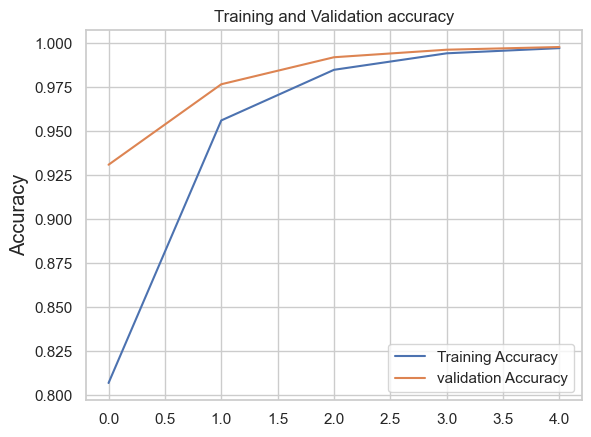

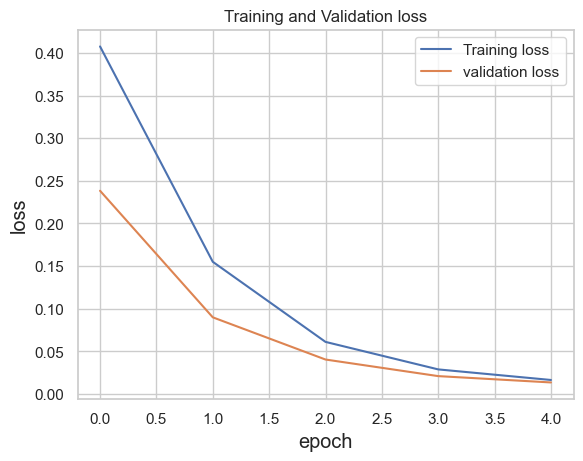

In [122]:
# Plot the changes in accuracy and loss over epochs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.plot(history_novelty.history['accuracy'])
plt.plot(history_novelty.history["val_accuracy"])
plt.title("Training and Validation accuracy")
plt.ylabel('Accuracy', fontsize="large")
plt.legend(['Training Accuracy','validation Accuracy'])
plt.show()

plt.plot(history_novelty.history['loss'])
plt.plot(history_novelty.history["val_loss"])
plt.title("Training and Validation loss")
plt.ylabel("loss", fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(['Training loss','validation loss'])
plt.show()

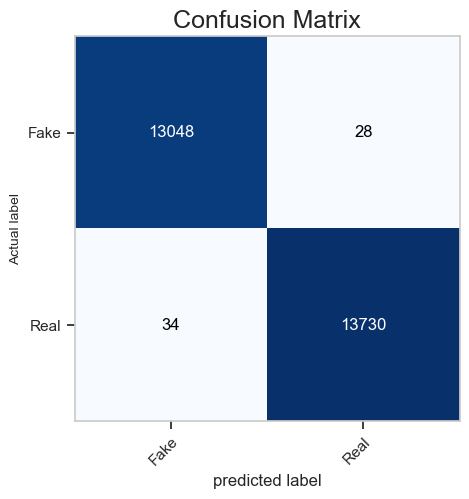

In [123]:
#To plot the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_test)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(5, 5), cmap=plt.cm.Blues,class_names=['Fake','Real'])
plt.ylabel('Actual label', fontsize=10)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [124]:
print('Classification Report')
print(classification_report(y_test,y_pred_test))
# accuracy: (tp + tn) / (p + n)
Novelty_accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy: %f' % Novelty_accuracy)
# precision: tp / (tp + fp)
Novelty_precision = precision_score(y_test,y_pred_test,average='weighted')
print('Precision: %f' % Novelty_precision)
# recall: tp / (tp + fn)
Novelty_recall = recall_score(y_test,y_pred_test,average='weighted')
print('Recall: %f' % Novelty_recall)
# Sensitivity/TPR=TP/TP+FN-It tells us what proportion of the positive class got correctly classified.
Novelty_sensitivity=conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[1,0])
print('Sensitivity: %f' % Novelty_sensitivity)
# specificity: TN / float(TN+FP)
Novelty_specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print('Specificity: %f' % Novelty_specificity)
# f1: 2 tp / (2 tp + fp + fn)
# FMeasure = (2 * Precision * Recall) / (Precision + Recall)
Novelty_f1_score = f1_score(y_test,y_pred_test,average='weighted')
print('F1-Score: %f' % Novelty_f1_score)

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13076
         1.0       1.00      1.00      1.00     13764

    accuracy                           1.00     26840
   macro avg       1.00      1.00      1.00     26840
weighted avg       1.00      1.00      1.00     26840

Accuracy: 0.997690
Precision: 0.997690
Recall: 0.997690
Sensitivity: 0.997530
Specificity: 0.997859
F1-Score: 0.997690


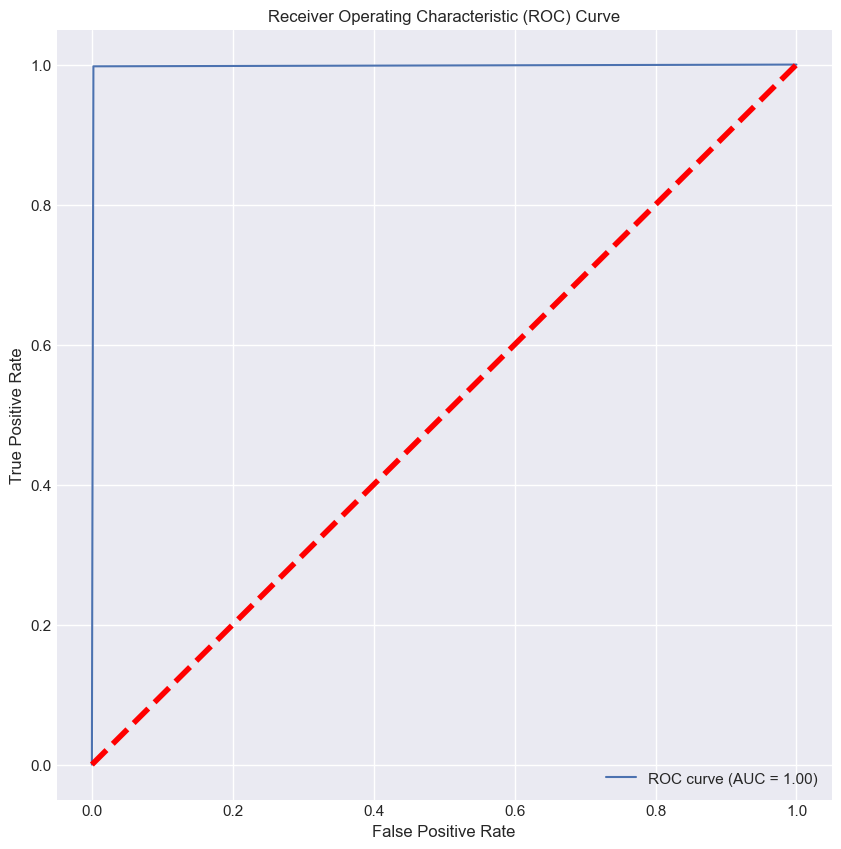

In [125]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
auc_score = roc_auc_score(y_test,y_pred_test)
plt.figure(figsize=(10,10))
plt.style.use("seaborn-darkgrid")
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1],lw=4,color="red",linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Comparison of Existing and Novelty

**Plot the changes in Accuracy and Loss over number of Epochs (All models)**

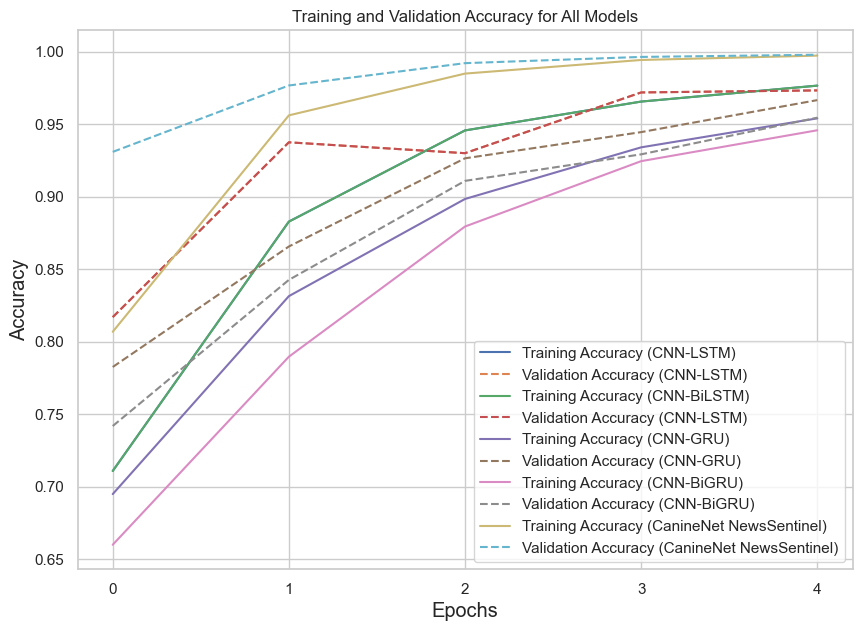

In [59]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,7))
plt.plot(history_CNN.history['accuracy'], label='Training Accuracy (CNN-LSTM)',linestyle='-')
plt.plot(history_CNN.history['val_accuracy'], label='Validation Accuracy (CNN-LSTM)',linestyle='--')
plt.plot(history_bilstm.history['accuracy'], label='Training Accuracy (CNN-BiLSTM)',linestyle='-')
plt.plot(history_bilstm.history['val_accuracy'], label='Validation Accuracy (CNN-LSTM)',linestyle='--')

plt.plot(history_GRU.history['accuracy'], label='Training Accuracy (CNN-GRU)',linestyle='-')
plt.plot(history_GRU.history['val_accuracy'], label='Validation Accuracy (CNN-GRU)',linestyle='--')

plt.plot(history_BiGRU.history['accuracy'], label='Training Accuracy (CNN-BiGRU)',linestyle='-')
plt.plot(history_BiGRU.history["val_accuracy"], label='Validation Accuracy (CNN-BiGRU)',linestyle='--')

plt.plot(history_novelty.history['accuracy'], label='Training Accuracy (CanineNet NewsSentinel)',linestyle='-')
plt.plot(history_novelty.history["val_accuracy"], label='Validation Accuracy (CanineNet NewsSentinel)',linestyle='--')
plt.title("Training and Validation Accuracy for All Models")
plt.xlabel('Epochs', fontsize="large")
plt.xticks(range(0, 5, 1))
plt.ylabel('Accuracy', fontsize="large")
plt.legend()
plt.show()


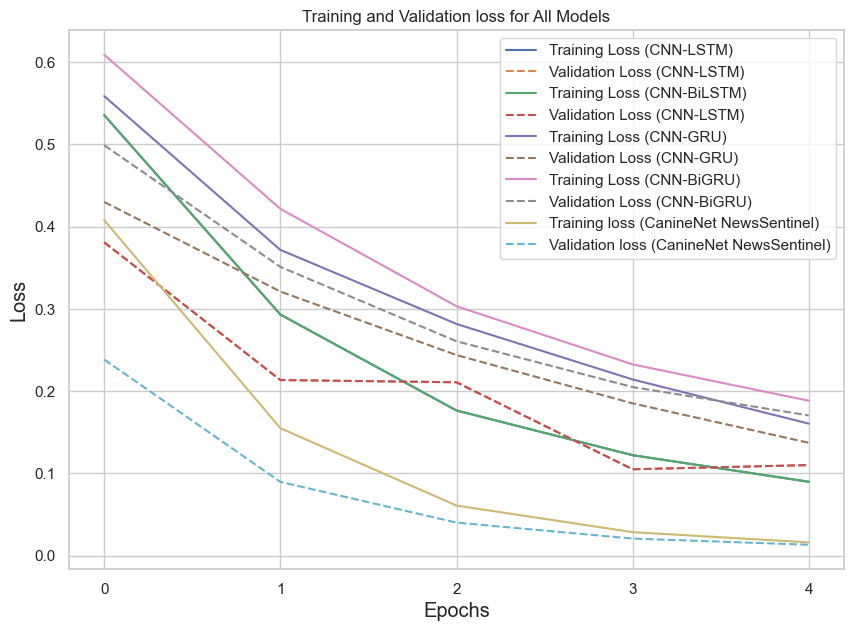

In [65]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,7))
plt.plot(history_CNN.history['loss'], label='Training Loss (CNN-LSTM)',linestyle='-')
plt.plot(history_CNN.history['val_loss'], label='Validation Loss (CNN-LSTM)',linestyle='--')
plt.plot(history_bilstm.history['loss'], label='Training Loss (CNN-BiLSTM)',linestyle='-')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss (CNN-LSTM)',linestyle='--')

plt.plot(history_GRU.history['loss'], label='Training Loss (CNN-GRU)',linestyle='-')
plt.plot(history_GRU.history['val_loss'], label='Validation Loss (CNN-GRU)',linestyle='--')

plt.plot(history_BiGRU.history['loss'], label='Training Loss (CNN-GRU)',linestyle='-')
plt.plot(history_BiGRU.history['val_loss'], label='Validation Loss (CNN-GRU)',linestyle='--')

plt.plot(history_novelty.history['loss'], label='Training Accuracy (CanineNet NewsSentinel)',linestyle='-')
plt.plot(history_novelty.history["loss"], label='Validation Accuracy (CanineNet NewsSentinel)',linestyle='--')

plt.title("Training and Validation loss for All Models")
plt.xlabel('Epochs', fontsize="large")
plt.xticks(range(0, 5, 1))
plt.ylabel('Loss', fontsize="large")
plt.legend()
plt.show()


In [48]:
import pandas as pd
result={'CNN with LSTM':(CNN_LSTM_accuracy,CNN_LSTM_precision,CNN_LSTM_recall,CNN_LSTM_sensitivity,CNN_LSTM_specificity,CNN_LSTM_f1_score), 
        'CNN with BiLSTM': (CNN_BiLSTM_accuracy,CNN_BiLSTM_precision,CNN_BiLSTM_recall,CNN_BiLSTM_sensitivity,CNN_BiLSTM_specificity, CNN_BiLSTM_f1_score),
        'CNN with GRU':(CNN_GRU_accuracy,CNN_GRU_precision,CNN_GRU_recall,CNN_GRU_sensitivity,CNN_GRU_specificity,CNN_GRU_f1_score),
        'CNN with BiGRU': (CNN_BiGRU_accuracy,CNN_BiGRU_precision,CNN_BiGRU_recall,CNN_BiGRU_sensitivity,CNN_BiGRU_specificity, CNN_BiGRU_f1_score),
        'CanineNet NewsSentinel': (Novelty_accuracy,Novelty_precision,Novelty_recall,Novelty_sensitivity,Novelty_specificity,Novelty_f1_score)}
result=pd.DataFrame(result,index=['Accuracy','Precision','Recall','Sensitivity','Specificity','F1-score'])

In [49]:
result=result.round(decimals=3)
result

CNN with LSTM  CNN with BiLSTM  CNN with GRU  CNN with BiGRU  \
Accuracy             0.975            0.977         0.966           0.954   
Precision            0.975            0.977         0.966           0.954   
Recall               0.975            0.977         0.966           0.954   
Sensitivity          0.968            0.983         0.969           0.954   
Specificity          0.982            0.970         0.963           0.954   
F1-score             0.975            0.977         0.966           0.954   

             CanineNet NewsSentinel  
Accuracy                      0.998  
Precision                     0.998  
Recall                        0.998  
Sensitivity                   0.998  
Specificity                   0.998  
F1-score                      0.998

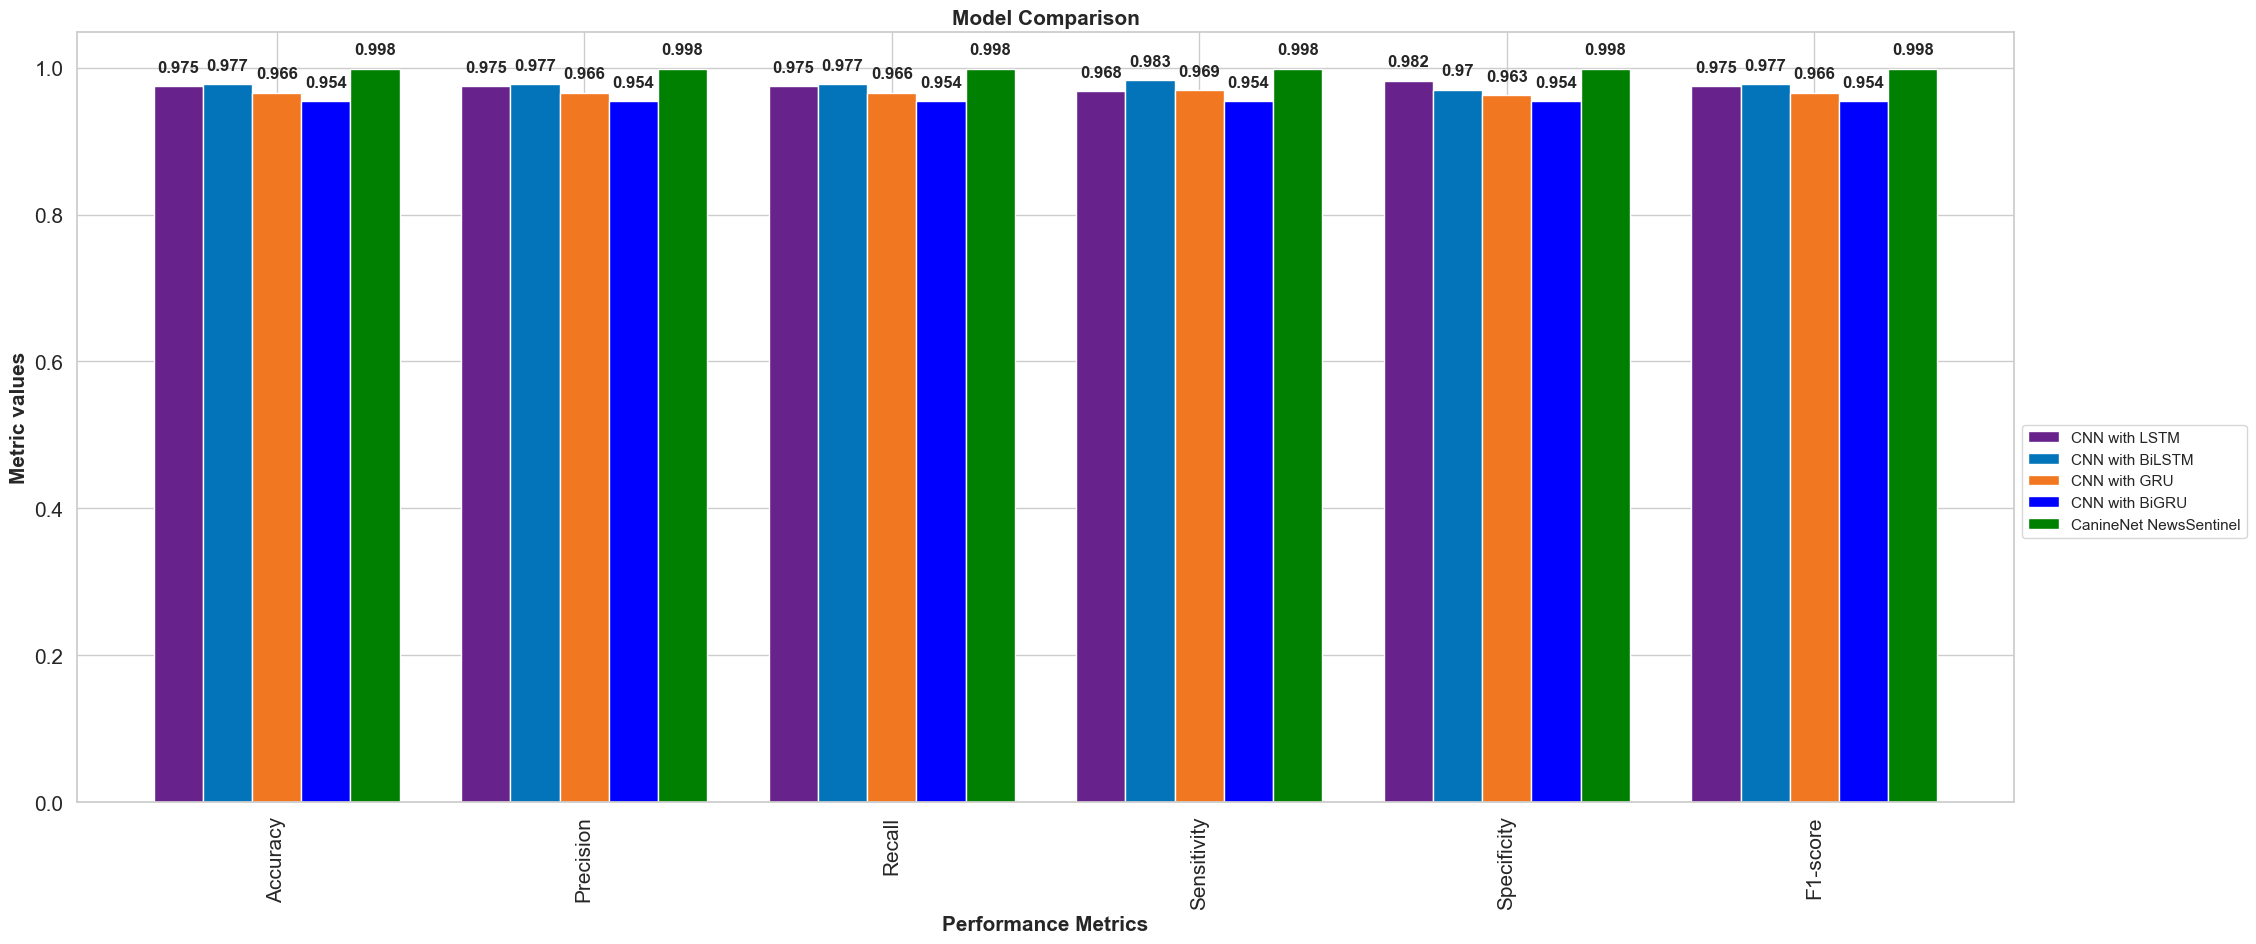

In [50]:
#Performance Metrics of Existing and Novelty
import matplotlib.pyplot as plt
colors_list=['#68228B','#0474BA','#F17720','blue','green']
ax = result.plot(kind='bar', figsize=(25,10), width=0.8, color=colors_list, edgecolor=None, fontsize=15)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center',fontweight='bold')

plt.title("Model Comparison",size=15,fontweight="bold")
plt.xlabel("Performance Metrics",size=15,fontweight="bold")
plt.ylabel("Metric values",size=15,fontweight="bold")
plt.legend(bbox_to_anchor =(1, 0.5))
plt.show()

**COMPUTATION TIME COMPARISON**

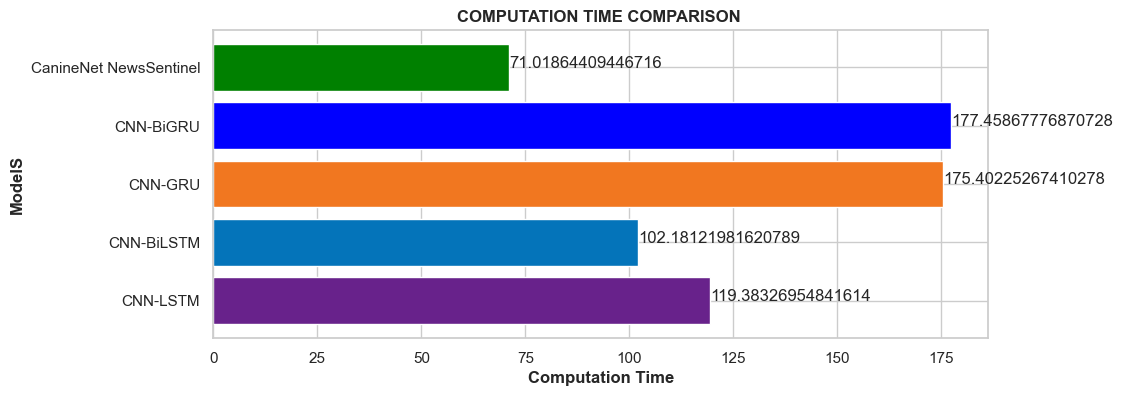

In [51]:
import matplotlib.pyplot as plt
computation_time_all = {'CNN-LSTM':119.38326954841614, 'CNN-BiLSTM':102.18121981620789,'CNN-GRU':computation_time_gru,
                       'CNN-BiGRU':177.45867776870728,'CanineNet NewsSentinel':71.01864409446716 }

label = list(computation_time_all.keys())
model = list(computation_time_all.values())

color=['#68228B','#0474BA','#F17720','blue','green']

fig = plt.figure(figsize = (10, 4))

plt.barh(label, model, color =color )

for index, value in enumerate(model):
    plt.text(value, index,
             str(value))
    
plt.xlabel("Computation Time",fontweight ="bold",fontsize=12)
plt.ylabel("ModelS",fontweight ="bold",fontsize=12)
plt.title("COMPUTATION TIME COMPARISON ",fontweight ="bold",fontsize=12)
plt.show()

# Model Evaluation

In [2]:
def embed_text_data(text, hub_layer):
    embedded_data = hub_layer(text)

    columns = [f"embedding_{i + 1}" for i in range(embedded_data.shape[1])]
    X_df = pd.DataFrame(data=embedded_data.numpy(), columns=columns)

    return X_df

In [4]:
# Load the text embedding model
import tensorflow as tf
import tensorflow_hub as hub
model_url = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(model_url, input_shape=[], dtype=tf.string, trainable=True)

def text_process(text):
    text1=preprocess_text(text)
    text_embedding_df = embed_text_data([text1], hub_layer)
    # Assuming X_train and X_test are your input arrays
    return text_embedding_df

In [6]:
import pandas as pd
user_text = "I am feeling happy 😊"
text_embedding=text_process(user_text)

In [7]:
from keras.models import load_model
model=load_model('CNN_hybrid_BiLSTM_text_embed.keras')

In [21]:
import numpy as np

def classify_news(text_embedding):
    pred = model.predict(text_embedding)
    pred_class = np.argmax(pred)
    if pred_class == 0:
        return 'Fake News'
    else:
        return 'Real News'

# Assuming text_embedding is properly shaped
result = classify_news(text_embedding)
print(result)

1/1 [==============================] - 0s 74ms/step
Fake News


In [25]:
cd alpaca/

D:\Arul-Projects\41236\final_work\alpaca


# To find Article Credibility Rate of Webpage

***The Article Credibility Rate of a webpage typically refers to a metric or score that indicates the perceived credibility or trustworthiness of the content presented on that webpage. It is often based on various factors such as the reliability of the information, the credibility of the sources cited, the author's expertise, the objectivity of the content, and the overall quality of the writing.***

***A high Article Credibility Rate indicates that the webpage is likely to provide trustworthy and reliable information, while a low rate may suggest that the content should be viewed with skepticism. This metric is important for readers and researchers to assess the credibility of the information they encounter online.***

In [26]:
def evaluate_webpage(url: str) -> float:
    """Scores a webpage's credibility by combining the credibility scores of different evaluators.

    Obtains the webpage data from parser, retrieves the signal sub-scores, validates the results and then computes an
    overall webpage credibility score using the **evaluation_weights** dict.

    :param url: URL of the webpage to be evaluated.
    :return: A credibility score from 0 (very low credibility) to 1 (very high credibility).
        Returns -1 if the webpage could not be parsed, and -2 if it could not be evaluated.
    """

    logger.info("[Evaluation] Evaluating " + url)

    page_data = parser.parse_data(url)
    # check for valid data
    if not page_data or not page_data.url or not page_data.html or len(page_data.text) < 50:
        logger.error("[Evaluation] Webpage parsing failed for " + url)
        return -1

    scores = {}
    weight_sum = 0
    final_score = 0

    # compute sub-scores and sum up overall score via linear combination
    for signal_name, signal in evaluation_signals.items():
        subscore = signal.evaluator(page_data)
        weight = signal.weight_func(subscore, page_data)
        # rescale weight linearly from 1x to 2x for score between [0.75, 0.25] to penalise low scores
        weight *= 2 - min(max((subscore - 0.25) * 2, 0), 1)

        scores[signal_name] = subscore
        final_score += subscore * weight
        weight_sum += weight
        stats_collector.add_result(url, "score_" + signal_name, subscore)

    # check for valid scores
    if not scores or len(scores) != len(evaluation_signals) or not all(0 <= score <= 1 for score in scores.values()):
        logger.error("[Evaluation] Error computing sub-scores: {}".format(scores))
        return -2

    logger.info("[Evaluation] Individual sub-scores: {}".format(
        [signal_name + " {:.3f}".format(score) for signal_name, score in scores.items()]))

    final_score = final_score / weight_sum
    logger.info("[Evaluation] Overall webpage score: {:.5f} for {}".format(final_score, url))
    stats_collector.add_result(url, "credibility_score", final_score)
    return final_score

In [5]:
import atexit
import logging
import os
from datetime import datetime
from pathlib import Path

import stats_collector
from parsing.webpage_parser import valid_address
from scoring.credibility_evaluation import evaluate_webpage

user_input = input("\nEnter webpage address: ")
if valid_address(user_input):
    score = evaluate_webpage(user_input)
    if 0 <= score <= 1:
        print("Webpage credibility score of the webpage: {:.5f}".format(score))
    else:
        print("Credibility score could not be calculated")
else:
    print("Invalid address")



Enter webpage address: https://www.oneindia.com/india/cong-has-always-been-an-appalling-party-for-me-kangana-ranaut-3785265.html
Webpage credibility score of the webpage: 0.53081


In [38]:
import atexit
import logging
import os
from datetime import datetime
from pathlib import Path

import stats_collector
from parsing.webpage_parser import valid_address
from scoring.credibility_evaluation import evaluate_webpage

user_input = input("\nEnter webpage address: ")


if valid_address(user_input):
    score = evaluate_webpage(user_input)
    if 0 <= score <= 1:
        print("Webpage credibility score of the webpage: {:.5f}".format(score))
    else:
        print("Credibility score could not be calculated")
else:
    print("Invalid address")



Enter webpage address: https://www.livemint.com/news/india/unemployment-rate-in-india-doubles-among-educated-youth-former-cea-kaushik-basu-says-change-is-coming-11711595014880.html
Webpage credibility score of the webpage: 0.58306


In [22]:
import gradio as gr
import requests
from bs4 import BeautifulSoup
import numpy as np
from sklearn.ensemble import IsolationForest
from transformers import pipeline

# Assume you have defined preprocess_text, roberta_tokenizer, and roberta_model elsewhere in your code

def scrape_text(url):
    # Send an HTTP request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract text data from the page
        text_data = ""
        for paragraph in soup.find_all('p'):
            text_data += paragraph.get_text() + "\n"

        return text_data.strip()
    else:
        print(f"Error: Unable to fetch the page. Status code: {response.status_code}")
        return None

def classify_fake_real(text):
    preprocess_text1 = preprocess_text(text)

    # Tokenize and encode the text data for RoBERTa
    train_embeddings = text_process(preprocess_text1)

    # Predict fake or real news
    final_pred = model.predict(train_embeddings)
    pred_class = np.argmax(final_pred)
    return 'Fake News' if pred_class == 0 else 'Real News'

def result(url):
    # Scrape text from the given URL
    scraped_text = scrape_text(url)

    if scraped_text:
        # Classify fake/real news
        fake_real_prediction = classify_fake_real(scraped_text)

        return fake_real_prediction
    else:
        return {"Error": "Unable to fetch the page."}

In [30]:
import atexit
import logging
import os
from datetime import datetime
from pathlib import Path

import stats_collector
from parsing.webpage_parser import valid_address
from scoring.credibility_evaluation import evaluate_webpage
url=input('Enter the URL:')
model_result=result(url)
print('model_result:',model_result)
if valid_address(url):
    score = evaluate_webpage(url)
    if 0 <= score <= 1:
        print("Webpage credibility score of the webpage: {:.5f}".format(score))
    else:
        print("Credibility score could not be calculated")
else:
    print("Invalid address")

Enter the URL:https://www.livemint.com/news/india/unemployment-rate-in-india-doubles-among-educated-youth-former-cea-kaushik-basu-says-change-is-coming-11711595014880.html
1/1 [==============================] - 0s 63ms/step
model_result: Fake News
Webpage credibility score of the webpage: 0.58306


# Clickbait Detection in news URL

***Clickbait is a form of online content that uses sensational or misleading headlines to entice people to click on a link. The purpose of clickbait is typically to drive traffic to a website or to generate ad revenue. The term “clickbait” originated from the fact that the headlines are designed to bait readers into clicking the links, which then directs them to a website where they can view the content.***

***Clickbait is often associated with online news articles, social media posts, and videos, but it can appear on any platform where content is shared. The content of the link may or may not be related to the headline, and it may not be of high quality or informative. Clickbait headlines are often written in a way that is designed to provoke an emotional response in the reader, such as fear, anger, or curiosity.***

In [31]:
import io
import logging
import pickle
import re
import string
from contextlib import redirect_stderr
from pathlib import Path

from scipy import sparse

import stats_collector
from parsing.webpage_data import WebpageData

logger = logging.getLogger("alpaca")


def evaluate_clickbait(data: WebpageData) -> float:
    """Determines whether a webpage's headline is clickbait.

    :return: 1 if the headline is not clickbait (or empty), 0 if it is.
    """

    score = 0 if data.headline and _is_clickbait(data.headline) else 1
    stats_collector.add_result(data.url, "clickbait", score if data.headline else -10)
    return score


def _is_clickbait(headline: str) -> bool:
   
    """Clickbait classifier:

    :return: True if submitted headline is clickbait, False otherwise.
    """

    # load pickled model and tfidf vectorizer, redirect external error prints to logger
    with redirect_stderr(io.StringIO()) as buf:
        with open("scoring/files/nbmodel.pkl", "rb") as model_file:
            model = pickle.load(model_file)
        with open("scoring/files/tfidf.pkl", "rb") as vectorizer_file:
            vectorizer = pickle.load(vectorizer_file)
        for message in buf.getvalue().strip().split("\n"):
            if message:
                logger.debug("[Clickbait>External] " + str(message))

    cleaned_headline = _clean_text(headline)
    headline_words = len(cleaned_headline.split())
    question = _contains_question(cleaned_headline)
    exclamation = _contains_exclamation(cleaned_headline)
    starts_with_num = _starts_with_number(cleaned_headline)

    logger.debug("[Clickbait] Cleaned headline: " + cleaned_headline)

    vectorizer_input = [cleaned_headline]
    vectorized = vectorizer.transform(vectorizer_input)
    final = sparse.hstack([question, exclamation, starts_with_num, headline_words, vectorized])
    result = model.predict(final)

    return result == 1


def _clean_text(text: str) -> str:
    
    #Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.

    text = text.lower()
    # text = re.sub("\w*\d\w*", " ", text)
    text = re.sub("\n", " ", text)
    text = re.sub("  ", " ", text)
    text = re.sub(r"^https?:\/\/.*[\r\n]*", "", text, flags=re.MULTILINE)
    text = re.sub(r"\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*", "", text)
    text = re.sub("\[.*?\]", " ", text)
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    text = re.sub("“", "", text)
    text = re.sub("”", "", text)
    text = re.sub("’", "", text)
    text = re.sub("–", "", text)
    text = re.sub("‘", "", text)
    return text


def _contains_question(headline: str) -> int:
    if "?" in headline or headline.startswith(("who", "what", "where", "why", "when", "whose", "whom", "would", "will",
                                               "how", "which", "should", "could", "did", "do")):
        return 1
    else:
        return 0

def _contains_exclamation(headline: str) -> int:
    return 1 if "!" in headline else 0


def _starts_with_number(headline: str) -> int:
    return 1 if headline.startswith(("1", "2", "3", "4", "5", "6", "7", "8", "9")) else 0


In [33]:
import requests
from bs4 import BeautifulSoup

def extract_headlines(url):
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all the headline tags (e.g., <h1>, <h2>, <h3>) in the page
    headlines = []
    for tag in ['h1', 'h2', 'h3']:
        headlines.extend(soup.find_all(tag))
    
    # Extract the text from the headline tags
    headline_texts = [headline.get_text() for headline in headlines]
    
    return headline_texts

# Example URL
url = input('Enter URL:')
headlines = extract_headlines(url)

for headline in headlines:
    print(headline)


Enter URL:https://www.livemint.com/news/india/unemployment-rate-in-india-doubles-among-educated-youth-former-cea-kaushik-basu-says-change-is-coming-11711595014880.html
Unemployment rate in India doubles among educated youth: Former CEA Kaushik Basu says, ‘Change is coming’
‘I’m optimistic ordinary people can see this & change is coming,’ said former Chief Economic Advisor (CEA) Kaushik Basu.
Rahul Gandhi slams Centre
Congratulations!


**If a headline is determined to have no clickbait elements, it means that it does not use tactics like exaggeration, sensationalism, or misleading information to entice people to click on it. Instead, it likely provides a straightforward and accurate representation of the content it is associated with.**

In [34]:
from parsing.webpage_data import WebpageData  # Assuming this import is correct for your environment

# Assuming the `data` object contains the headline and URL
data = WebpageData(headline=headline,url=url)
# Use the function to get the clickbait score
clickbait_score = evaluate_clickbait(data)

# Check the score to determine if the headline is clickbait
if clickbait_score == 0:
    print("Not Clickbait")
else:
    print("Clickbait")

Not Clickbait


In [36]:
import requests
from bs4 import BeautifulSoup

def extract_headlines(url):
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all the headline tags (e.g., <h1>, <h2>, <h3>) in the page
    headlines = []
    for tag in ['h1', 'h2', 'h3']:
        headlines.extend(soup.find_all(tag))
    
    # Extract the text from the headline tags
    headline_texts = [headline.get_text() for headline in headlines]
    
    return headline_texts

# Example URL
url = input('Enter URL:')
headlines = extract_headlines(url)

for headline in headlines:
    print(headline)


Enter URL:https://www.livemint.com/news/india/unemployment-rate-in-india-doubles-among-educated-youth-former-cea-kaushik-basu-says-change-is-coming-11711595014880.html
Unemployment rate in India doubles among educated youth: Former CEA Kaushik Basu says, ‘Change is coming’
‘I’m optimistic ordinary people can see this & change is coming,’ said former Chief Economic Advisor (CEA) Kaushik Basu.
Rahul Gandhi slams Centre
 Do we need to fact-check the fact-checker? 
 Atomic clocks to ring in one-nation, one time 
 When will India’s oil demand peak? The govt’s calculating 
 Full-year budget will include key February targets 
 Capital markets in India have seen steady domestic flows: BoA's Balakrishnan 
 Is corruption but an excuse to wipe out opposition? 
 ‘Innovation will be key differentiator in SaaS’ 
 Mint Primer | Happiness report: Why it has raised eyebrows in India 
 For private InvITs, a new asset category is about to open up 
 How celebrity brands finally reach the point of sale 
Co

In [41]:
from parsing.webpage_data import WebpageData  # Assuming this import is correct for your environment

# Assuming the `data` object contains the headline and URL
data = WebpageData(headline=headline,url=url)
# Use the function to get the clickbait score
clickbait_score = evaluate_clickbait(data)

# Check the score to determine if the headline is clickbait
if clickbait_score == 0:
    print("Not Clickbait")
else:
    print("Clickbait")


Not Clickbait


# To Build Poor framing & Trust Worthiness based on the context of the text

In [36]:
url=input('Enter URL:')
scraped_text = scrape_text(url)

Enter URL:https://www.livemint.com/news/india/unemployment-rate-in-india-doubles-among-educated-youth-former-cea-kaushik-basu-says-change-is-coming-11711595014880.html


In [40]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Tokenize the news text
inputs = tokenizer(scraped_text, return_tensors='pt', max_length=512, truncation=True)

# Make a prediction
outputs = model(**inputs)
predictions = torch.softmax(outputs.logits, dim=1)
trustworthiness_score = predictions[0][1].item()  # Trustworthiness score (assuming 0 is fake, 1 is real)

print(f"Trustworthiness Score: {trustworthiness_score:.2f}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trustworthiness Score: 0.60


In [41]:
# keyword-based poor framing detection
poor_framing_keywords = [
    'sensational', 'manipulative', 'misleading', 'biased', 'one-sided', 'fake', 'fabricated',
    'unreliable', 'unsubstantiated', 'clickbait', 'propaganda', 'conspiracy', 'distorted',
    'manipulated', 'false', 'deceptive', 'speculative', 'inaccurate', 'exaggerated'
]

poor_framing = any(keyword in news_text.lower() for keyword in poor_framing_keywords)

# Print results
print(f"Poor Framing Detected: {poor_framing}")

Poor Framing Detected: False
